# Machine learning

L’apprentissage automatique ou apprentissage machine (Machine Learning) est un ensemble de techniques algorithmiques produisant des modèles à partir de données...


## Regression :

Nous allons commencer par nous intéresser au processus de la régression. En simplifiant les cas de figures, dans quelles conditions nous intéressons nous à une régression ? Tout d'abord, quand on parle de regression, il faut être plus précis... Régression linéaire (simple multiple) ? Logistique ?

Donc pour continuer dans la simplicité disons : 
* <u>Linéaire</u> : Lorsque l'on souhaite prédire une variable quantitative (quel sera le salaire en fonction des caractéristiques ?, quel sera le loyer/prix d'un bien en fonction de ses propriétés ?, quel sera l'age pour lequel les premiers symptomes de la maladie apparaitront ?
* <u>Logistique</u> : Lorsque l'on souhaite prédire une variable qualitative : il s'agit d'un problème de classification. La regression logistique fait donc partie d'une vaste gammes d'algorithmes permettant de faire de la classification.

Pour commencer, nous allons nous intéresser à la regression linéaire multiple avec régularisation...

Mais quoi donc qu'est-ce-t-il ?

La regression linéaire multiple est donc très utile pour prédire une variable quantitative en fonction de plusieurs paramètres (plusieurs variables explicatives). Sur une régression linéaire multiple, un problème potentiel c'est la multitude de variables explicative, la potentielle co-dépendance des variables.... Nous ne verrons pas ici l'application de la regression linéaire, mais plutot sa version régularisée.

Il faut s'intéresser un peu à l'entrainement d'un modèle, au training :
Quel est 'objectif d'un modèle ? apprendre de nos données et faire une prédiction ? une valeur, une classe.... L'idée c'est donc d'atteindre un entrainement qui va minimiser l'écart entre ce que notre modèle prédit et la réalité ! Enfin.........

![fit_overfit](https://miro.medium.com/max/1400/1*ja9Dhcglifqi7EXbTHJKhw.png)

En réalité, un modèle trop ajusté, trop entrainé ne sera jamais un bon modèle, car il sera beaucoup trop spécifique aux données d'entrainement et ne sera pas capable de s'adapter à des données qu'il ne connait pas... Cela dit, cela peut être une méthodologie de travail parfois employée, notamment avec les réseaux de neurones : 
1. Pousser le modèle au sur-entrainement. En effet, de cette manière là, on peut supposer que nous ne serons pas en mesure d'obtenir un meilleur modèle que celui-ci (normalement, les performances "training" sont bonnes à ce stade).
2. Mettre en place des mécanismes qui luttent contre le sur-apprentissage. Ces mécanismes font en général chutter la performance du modèle, au profit de sa généralisation, une caractéristique cruciale. Pour un réseau de neurone, ça peut être, la mise en place de couches de drop-out, la mise en place d'un "image-data-generator".... Pour une régression, ça peut donc être la mise en place de la régularisation. 

![biais](https://ichi.pro/assets/images/max/724/0*JtBgI82Zm-SSD10u.png)


![biais_2](https://i0.wp.com/blog.enioka.com/wp-content/uploads/2022/03/Capture-de%CC%81cran-2022-03-01-a%CC%80-14.02.48.png?ssl=1)

La régularisation est une technique qui aidera un modèle à fonctionner sur des données qu'il n'a jamais vues auparavant.

On va retrouver deux types de régularisations : 
* Ridge
* Lasso

Pour la <u>régression Ridge</u>, il s'agit d'ajouter une contrainte sur les coefficients lors de la modélisation pour **maîtriser l'amplitude de leurs valeurs**. Cette contrainte se concrétise par l'ajout d'une **fonction de pénalité** sous la forme d'une norme L2 des coefficients, à la somme des carrées des résidus que l'on cherche à minimiser. Cette fonction de pénalité s'accompagne d'un coefficient de pénalité (α) à fixer, qui permet de contrôler l'impact de la pénalité. On parle de « shrinkage » (rétrécissement) : on rétrécit les plages de valeurs que peuvent prendre les paramètres estimés.

La <u>régression Lasso</u> est similaire à la régression Ridge, la seule différence entre les deux étant la contrainte sur **la norme L1 avec Lasso**, plutôt que sur la norme L2. Ainsi, Lasso peut faire office de dispositif **de sélection de variables** en annulant certains coefficients βj de la régression. En effet certaines variables voient leur coefficient estimé nuls et sont de facto exclues du modèle prédictif. il est à noter que, plus le coefficient de pénalité est élevé, plus le nombre de coefficients estimés à 0 augmente, et donc, plus on élimine de variables !

[Comprendre les différences entre les normes L1 et L2 !](https://ichi.pro/fr/visualisation-de-la-regularisation-et-des-normes-l1-et-l2-239017789921586)

La différence entre eux est importante à noter.
* La régression Ridge sera préférable à utiliser lorsqu'il y a beaucoup de fonctionnalités importantes dans le modèle, car elle les pénalisera, mais ne supprimera pas les moins importantes. 
* Le lasso sera mieux utilisé lorsque vous essayez uniquement d'utiliser les fonctionnalités les plus importantes de votre modèle.

Dans le package scikit-learn, vous trouverez donc la possibilité de procéder à des régressions linéaires régularisés avec la régularisation Ridge et la régularisation Lasso.

Au premier abord, on pourrait se dire que Lasso est donc de toute façon toujours meilleur car cette régularisation peut exclure les variables considérées comme non importante... et pourtant... Dans les problèmes à très grandes dimensions (p >> n), LASSO ne sélectionne que n variables prédictives au maximum, mécaniquement. C’est une vraie limitation de l’algorithme.

Ainsi, Parmi un groupe de variables corrélées, LASSO en choisit une, celle qui est la plus liée à a cible souvent, masquant l’influence des autres. Cet inconvénient est inhérent aux techniques intégrant un mécanisme de sélection de variables (ex. arbres de décision, quoique…).

Alors, pourquoi choisir ? Surtout qu'il existe aussi une regression appelée <u>**ElasticNet**</u> qui permet d'associer le meilleur des 2 mondes : la régularisation Ridge et la régularisation Lasso.

C'est notamment ce que nous allons faire dans cette première partie.

> <u>Consigne</u>:
> * Lancer la cellule suivante pour faire les imports dont nous allons avoir besoin !

In [1]:
import numpy as np
import pandas as pd
pd.set_option('display.max_columns', False)

from sklearn.linear_model import Ridge, Lasso, ElasticNet
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn import model_selection, preprocessing
from sklearn.linear_model import LinearRegression, RidgeCV, LassoCV,ElasticNetCV

import matplotlib.pyplot as plt

from IPython.display import display

import warnings
warnings.filterwarnings("ignore")

# Première exploration

Reprenons la fonction que nous avions créé il y a bien quelques heures maintenant...

> Consigne:
> * Reprendre la fonction `resumetable()` que nous avions créé précédemment.

In [2]:
def resumetable(df) :
    print("Format de la base : {}".format(df.shape))
    index = df.columns

    cols = ["type","nb_nan","nb_unique","v1","v2","v3"]

    df_base = []

    for i in index :
        x = df[i]

        df_base.append([x.dtypes,x.isna().sum(),x.nunique(),x.iloc[0], x.iloc[1], x.iloc[2]])

    df_return = pd.DataFrame(df_base, columns=cols, index = index)

    return(df_return)

# Les données....

Cette fois, nous allons jouer avec un nouveau jeu de données :

> ### A data frame with 322 observations of major league players on the following 20 variables.
> * AtBat: Number of times at bat in 1986
> * Hits: Number of hits in 1986
> * HmRun: Number of home runs in 1986
> * Runs: Number of runs in 1986
> * RBI: Number of runs batted in in 1986
> * Walks: Number of walks in 1986
> * Years: Number of years in the major leagues
> * CAtBat: Number of times at bat during his career
> * CHits: Number of hits during his career
> * CHmRun: Number of home runs during his career
> * CRuns: Number of runs during his career
> * CRBI: Number of runs batted in during his career
> * CWalks:Number of walks during his career
> * League: A factor with levels A and N indicating player's league at the end of 1986
> * Division: A factor with levels E and W indicating player's division at the end of 1986
> * PutOuts: Number of put outs in 1986
> * Assists: Number of assists in 1986
> * Errors: Number of errors in 1986
> * Salary: 1987 annual salary on opening day in thousands of dollars
> * NewLeague: A factor with levels A and N indicating player's league at the beginning of 1987

> <u>Consignes:</u>
> * Importer les données dans une df nommée `dfsport`
> * Afficher le rapport à l'aide de la fonction `resumetable()` précédemment "créée"
> * Afficher les statistiques descriptives. Petite subtilité... en ajoutant `.T` après les instruction, nous allons transposer le visuel, et on se retrouvera donc avec les mesures en colonnes alors que chaque ligne correspondra aux variables.

In [3]:
dfsport = pd.read_csv("Sport1_reg_CNAM.csv", sep = ",", header = 0)

display(resumetable(dfsport))

display(dfsport.describe().T)

Format de la base : (322, 20)


,type,nb_nan,nb_unique,v1,v2,v3
AtBat,int64,0,247,293,315,479
Hits,int64,0,144,66,81,130
HmRun,int64,0,36,1,7,18
Runs,int64,0,96,30,24,66
RBI,int64,0,103,29,38,72
Walks,int64,0,89,14,39,76
Years,int64,0,22,1,14,3
CAtBat,int64,0,314,293,3449,1624
CHits,int64,0,288,66,835,457
CHmRun,int64,0,146,1,69,63


,count,mean,std,min,25%,50%,75%,max
AtBat,322.0,380.928571,153.404981,16.0,255.25,379.5,512.00,687.0
Hits,322.0,101.024845,46.454741,1.0,64.00,96.0,137.00,238.0
HmRun,322.0,10.770186,8.709037,0.0,4.00,8.0,16.00,40.0
Runs,322.0,50.909938,26.024095,0.0,30.25,48.0,69.00,130.0
RBI,322.0,48.027950,26.166895,0.0,28.00,44.0,64.75,121.0
Walks,322.0,38.742236,21.639327,0.0,22.00,35.0,53.00,105.0
Years,322.0,7.444099,4.926087,1.0,4.00,6.0,11.00,24.0
CAtBat,322.0,2648.683230,2324.205870,19.0,816.75,1928.0,3924.25,14053.0
CHits,322.0,717.571429,654.472627,4.0,209.00,508.0,1059.25,4256.0
CHmRun,322.0,69.490683,86.266061,0.0,14.00,37.5,90.00,548.0


# Commençons la préparation des données !

Comme à chaque fois, il y a une phase importante de préparation des données... peut-être même bien plus importante que la modélisation en soi.

Dans cet illustration de la regression régularisée, nous allons essayer de prédire le salaire des joueurs.

Nous allons donc :
* Créer un array avec notre variable cible
* Adopter une stratégie de gestion des NaN (si vous en avez vu).
* Adopter une stratégie pour les variables quantitatives
* Adopter une stratégie pour les variables qualitatives

> <u>Consignes:</u>
> * Au besoin, vérifier la présence de NaN. Vous constaterez que les NaN présents concernent les salaires, ces données ne nous intéressent donc pas du tout.
> * Supprimer les lignes contenant des NaN.
>
>
> * Créer la df `df_dummies` correspondant à la "dummification" des variables catégorielles (3 au total). La fonction `pd.get_dummies()` pourrait se révéler utile ici...
>
>
> * Créer la df `dfsport_quant` correspondant aux variables quantitatives de notre `dfsport`. Il faut donc exclure les variables catégorielles. Faire en sorte d'être certain que les variables restantes soient bien des **nombres décimaux**.
>
>
> * Nous allons standardiser les variables quantitatives. Il faut qu'elles aient une moyenne proche de 0 et un écart type proche de 1. Créer `scaler`, une instance `.StandardScaler()` issue du module `preprocessing`.
> * Entrainer notre objet `scaler` sur `dfsport_quant`.
> * Mettre à jour `dfsport_quant` (donc en quelque sorte, il faut la re-créer...) avec les valeurs standardisées. Vous pouvez toujours vérifier que la standardisation à bien fonctionné.
>
>
> * Créer `data` qui correspond à la jonction des variables quantitatives et des variables catégorielles. Attention, lorsque nous avons créé la df `df_dummies`, il n'y a toujours que 2 valeurs possibles. Ainsi, seule une seule des deux colonnes est importante (la seconde étant d'office l'inverse de la première...). Si vous n'avez pas bien compris cette partie, explorez un peu votre df `df_dummies`.
>
>
> * Supprimer la variable cible de `data`.
> * Créer un array `target` correspondant à la variable cible (celle à prévoir).
>
>
> * Finalement, à l'aide de la fonciton `train_test_split()` séparer notre jeux de données (et notre variable cible) préparée en objets : `X_train`, `X_test`, `y_train` et `y_test`. Le jeu d'entrainement comprend 80% des valeurs. Fixer l'état aléatoire à 123.

In [4]:
from sklearn.preprocessing import StandardScaler

dfsport = dfsport.dropna()

dfsport = dfsport.reset_index(drop=True)

df_dummies = pd.get_dummies(dfsport.select_dtypes(exclude=["int64","float64"]))

df_dummies = df_dummies.drop(columns=["League_A","Division_E","NewLeague_A"])

dfsport_quant = dfsport.select_dtypes(include=["int64","float64"]).astype("float64")

dfsport_quant_cols = dfsport_quant.columns

scaler = StandardScaler()

scaler.fit(dfsport_quant)

dfsport_quant_sc = pd.DataFrame(scaler.transform(dfsport_quant), columns=dfsport_quant.columns)

dfsport_quant_sc = dfsport_quant_sc.reset_index(drop=True)

df_dummies = df_dummies.reset_index(drop=True)

data = pd.concat([dfsport_quant_sc,df_dummies], axis=1)

cols = list(data.columns)

cols.pop(cols.index("Salary"))

data = data[cols]

target = dfsport_quant_sc["Salary"]

X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.2, random_state=123)

# <font color='orange'>Fin partie</font>

----

# Bonus1 (paramètres Standard scaler)

Quels sont les paramètres du standard scaler ? En effet, la fonction `.StandardScaler()` s'est occupée de tout pour nous, et nous a renvoyé un objet pour lequel chaque colonne à une moyenne de 0, et un écart type à 1.

Néanmoins, derrière tout cela, la fonction `.StandardScaler()` possède quand même des paramètres (aussi appelés attribus) auquel il est possible d'accéder. N'hésitez pas à consulter la [documentation](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html) pour en apprendre plus.

Parmi ces attribus, on retrouve (entre autres) :
* Les **moyennes** de chaques variables standardisée. On y accède à l'aide de la fonction **`.mean_`** de l'instance `StandardScaler()` qui a été entrainé.
* La **variance** de chaques variables standardisée. On y accède à l'aide de la fonction **`.var_`** de l'instance `StandardScaler()` qui a été entrainé.
* L'**échelle relative** de chaques variables standardisée. On y accède à l'aide de la fonction **`.scale_`** de l'instance `StandardScaler()` qui a été entrainé. **Cette échelle est très utile, car conjointement avec la moyenne, elle permet de retrouver les valeurs originales...!**

<u><font color='red'>A noter !</font></u> Les attribus seront normalement placés dans l'ordre des variables que vous avez indiqué pour le fit. C'est une donnée importante car si l'on souhaite utiliser ces valeurs pour retrouver les valeurs initiales d'une variable initiale, il faut utiliser la bonne moyenne et la bonne échelle relative...!


> <u>Consignes:</u>
> * Créer `moy_sc`, un array contenant les **moyennes** identifiées par l'instance `StandardScaler()` (`scaler`) que nous avons précédemment entrainées.
> * Créer `sca_sc`, un array contenant les **échelles** identifiées par l'instance `StandardScaler()` (`scaler`) que nous avons précédemment entrainées.
>
>
> * Créer `sc_params`, un dataframe qui contiendra 2 lignes: la première avec la moyenne, et la seconde avec l'écart (l'échelle relative), et cela pour chaque variable quantitative qui a été standardisé (variables de `dfsport_quant_sc`).
> * Afficher `sc_params`.

In [5]:
moy_sc = scaler.mean_

sca_sc = scaler.scale_

sc_params = pd.DataFrame([moy_sc,sca_sc], index=["moy_sc","sca_sc"])

display(sc_params)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
moy_sc,403.642586,107.828897,11.619772,54.745247,51.486692,41.114068,7.311787,2657.543726,722.186312,69.239544,361.220532,330.418251,260.266160,290.711027,118.760456,8.593156,535.925882
sca_sc,147.026890,45.039455,8.740443,25.491215,25.833461,21.676728,4.784494,2282.231674,646.966151,82.041163,330.568316,322.752315,263.553383,279.401874,144.804495,6.594002,450.260224


# Bonus1.5 (paramètres Standard scaler)

Après avoir réaliser le scaling, on peut parfois avoir envie de retrouver les valeurs que nous avions initialement. Il est possible d'utiliser l'échelle relative et la moyenne afin de retrouver une valeur ou transformer une nouvelle valeur, mais parfois, on souhaite faire l'opération inverse de toute notre df...
Il existe donc une fonction qui peut ici se révéler fort intéressante pour retrouver nos variables initiales. 

Il s'agit de la fonction `.inverse_transform()` qu'il faut appliquer à une instance de mise à l'échelle. Pour illustrer son utilisation, nous allons faire un petit exercice.

> <u>Consignes:</u>
> * Créer `dfsport_quant_sc_reversed`, une dataframe qui contient donc la transformation inverse de notre df mise à l'échelle (pour rappel, il s'agit de `dfsport_quant_sc`).
> * Créer `salary_sc_reversed`, une dataframe qui continent 3 colonnes: la première avec le salaire que l'on trouve dans `dfsport`, la seconde avec le salaire que l'on trouve dans `dfsport_quant_sc`, et la troisième avec le salaire *reversed*.
> * Afficher les 10 premières lignes de `salary_sc_reversed`.

In [6]:
dfsport_quant_sc_reversed = pd.DataFrame(scaler.inverse_transform(dfsport_quant_sc), columns=dfsport_quant_sc.columns)

salary_sc_reversed = pd.DataFrame(dfsport["Salary"], columns=["Salary"])

salary_sc_reversed["Salary_sc"] = dfsport_quant_sc["Salary"]

salary_sc_reversed["Salary_sc_reversed"] = dfsport_quant_sc_reversed["Salary"]

display(salary_sc_reversed.head(10))


,Salary,Salary_sc,Salary_sc_reversed
0,475.000,-0.135313,475.000
1,480.000,-0.124208,480.000
2,500.000,-0.079789,500.000
3,91.500,-0.987042,91.500
4,750.000,0.475445,750.000
5,70.000,-1.034792,70.000
6,100.000,-0.968164,100.000
7,75.000,-1.023688,75.000
8,1100.000,1.252774,1100.000
9,517.143,-0.041716,517.143


# Bonus (visualisation)

> <u>Consignes:</u>
> * Créer une heatmap à partir de matrice de correlation. Pour cela la fonction `.corr()` sera fort utile pour créer la matrice de corrélation initiale... Attention, certains packages seront peut-être manquants !

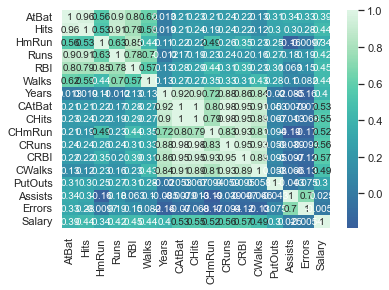

In [7]:
import seaborn as sns

corr = dfsport_quant.corr()

sns.set(rc={'figure.figsize':(16,16)})

sns.heatmap(data=corr, annot=True, cmap="mako", center = 0);

Quelle est la variable la plus corrélée à notre variable cible ?

# <font color='orange'>Fin partie</font>

----

# Première étape : "Benchmark"

Nous allons commencer par faire une première regression linéaire multiple bien classique....

Pour cela nous allons nous servir de `LinearRegression()` que nous avons importé tout en haut !

La procédure est en réalité très facile... Comme j'ai pu insister plusieurs fois, le défi n'est pas nécessairement le modèle qui est assez rapide à mettre en place (le calcul peut cependant être long). Le défi est souvent dans la mise à disposition / préparation des données préalable, et l'optimisation par la suite...

### Le scoring des modèles, une étape cruciale !

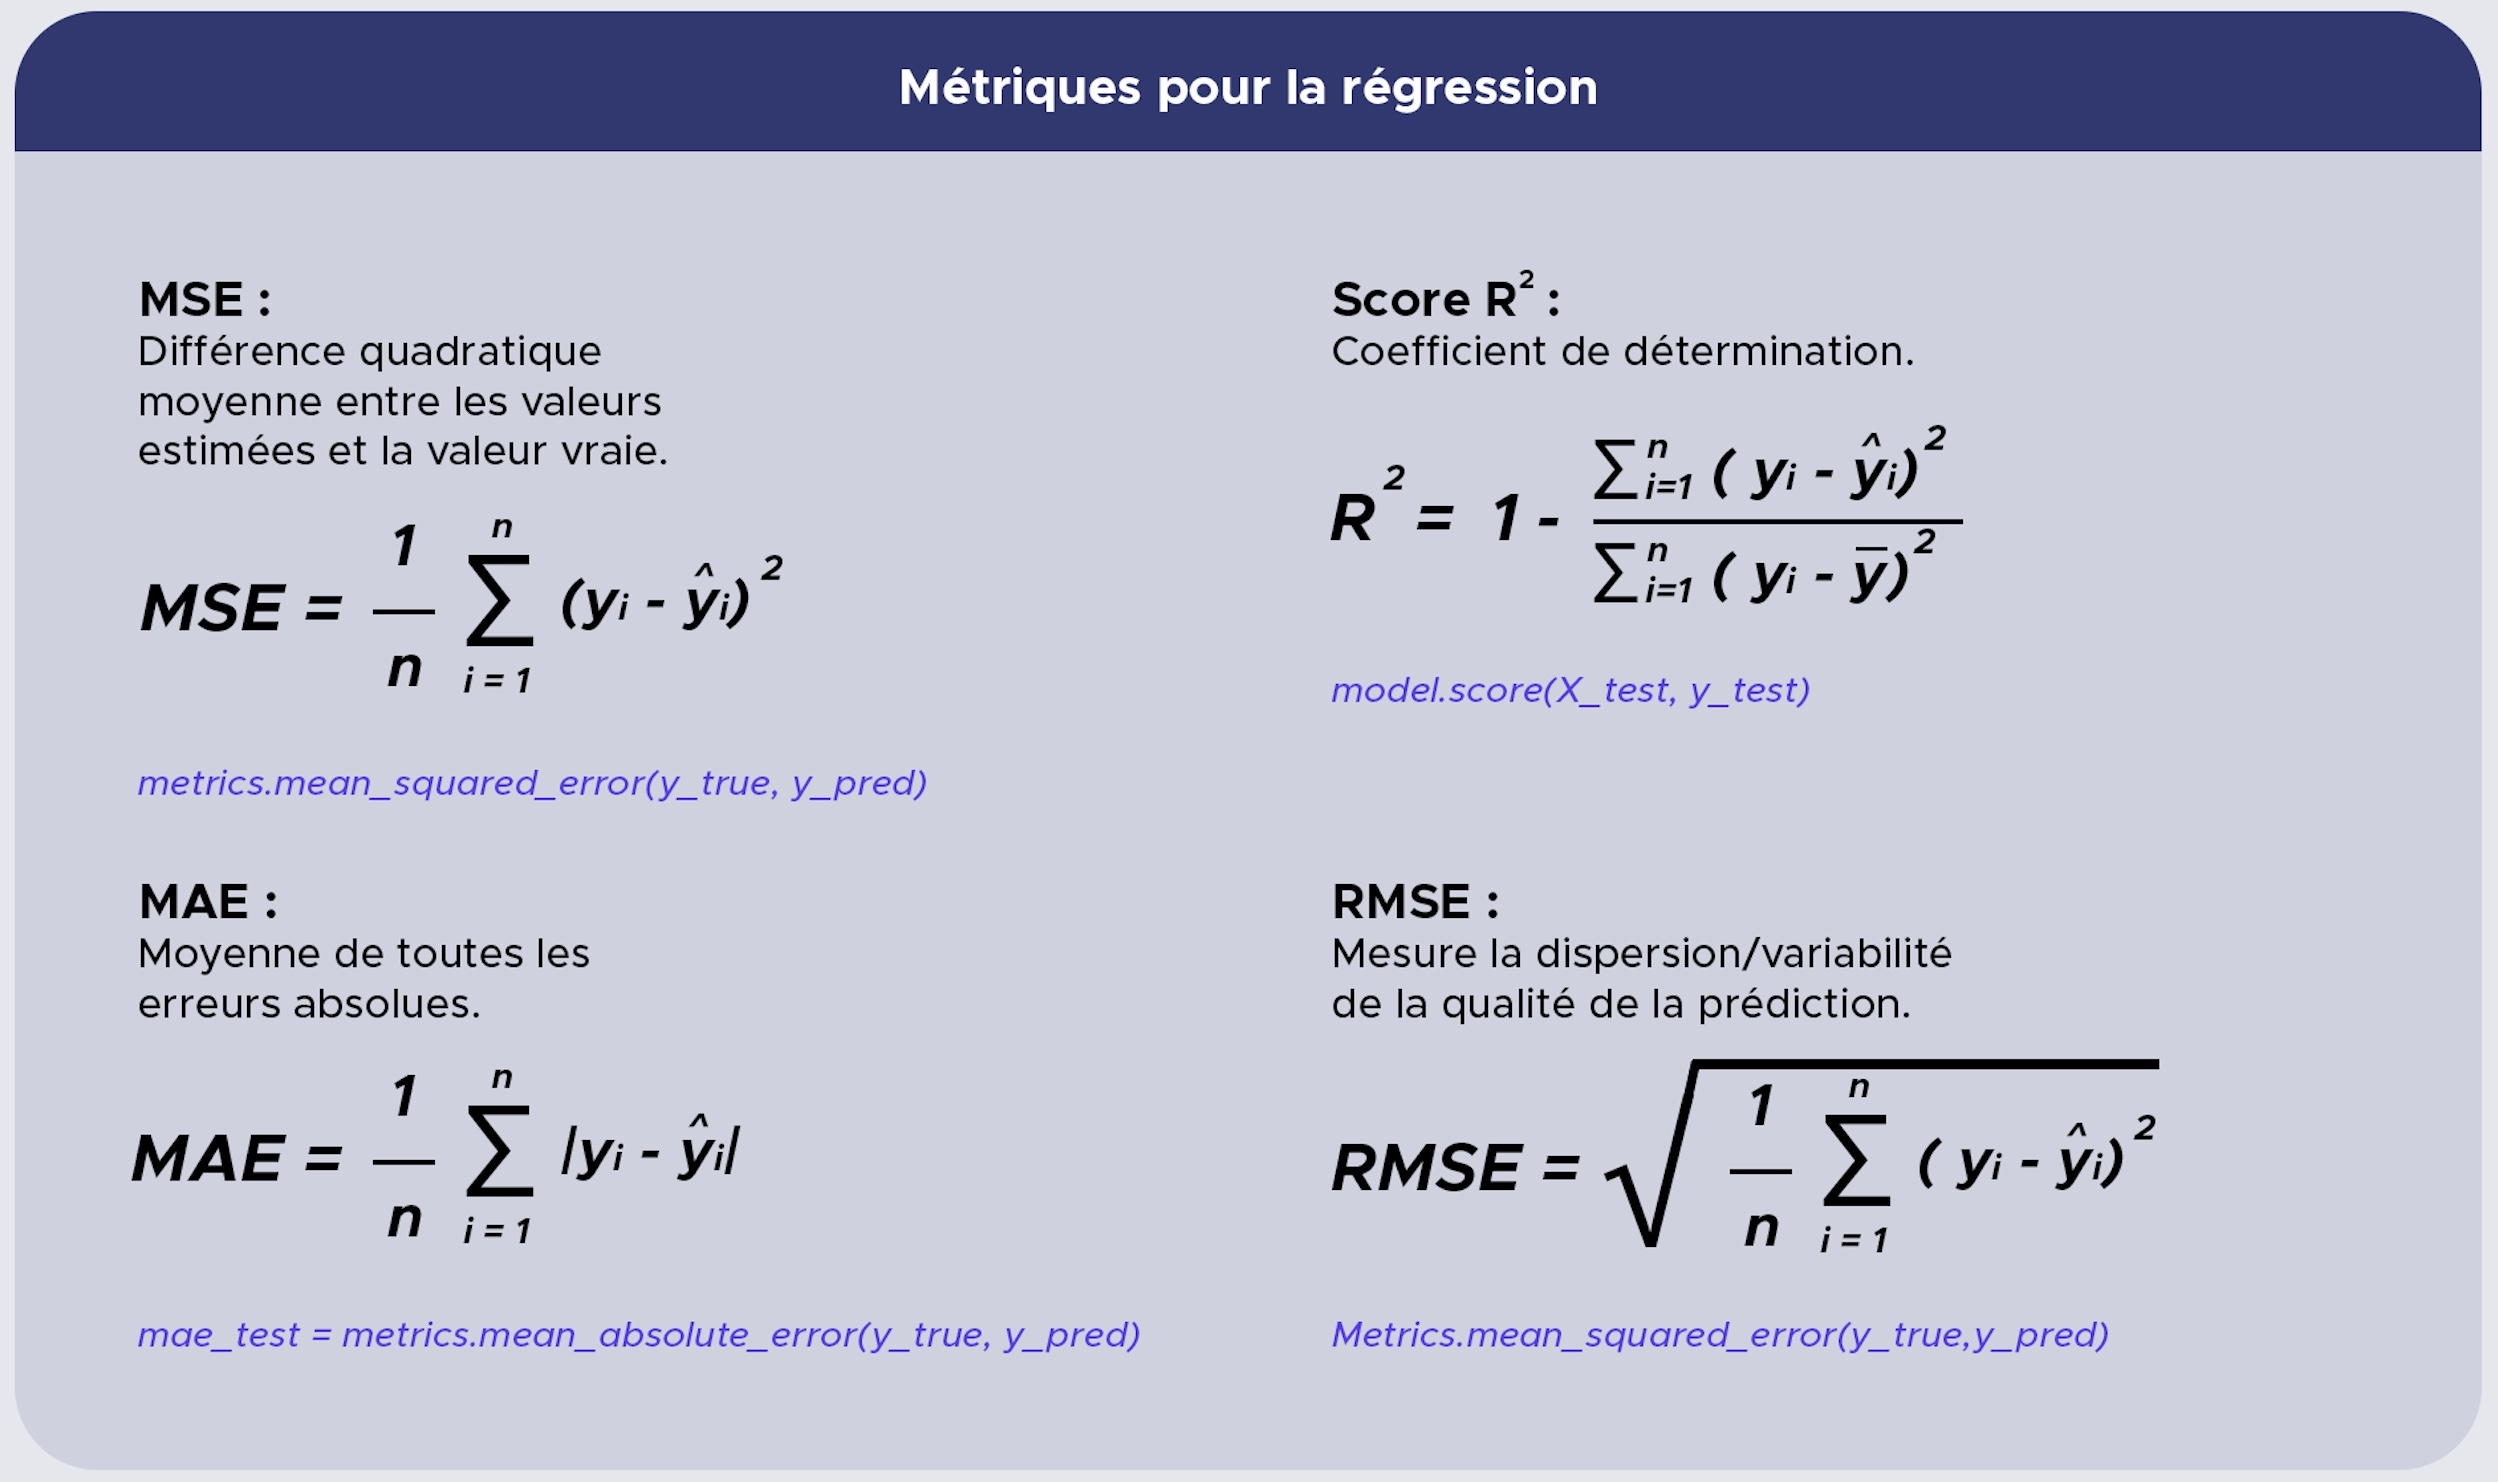



**Je ne pourrais que trop vous conseiller de fouiller sur internet pour aller chercher plus d'infos. Par exemple, [cette page](https://stanford.edu/~shervine/l/fr/teaching/cs-229/pense-bete-machine-learning-petites-astuces) est <u>très très bien faite</u> (et en français pour une fois)**.

Scikit-learn possède donc plusieurs fonctions qui permettent de réaliser le scoring de nos modèles : 
* La fonction `.score()` sur **une instance entrainée** permet de calculer le <font color='red'>$R^2$</font>. Cette fonction prend en arguments les données et leur valeur cible associée.
* La fonction `.mean_absolute_error()` sur **une instance entrainée et des valeurs prédites**, permet de calculer la <font color='red'>MAE</font>. Cette fonction prend en arguments les données cibles réelles et leur équivalent **prédit**.
* La fonction `.mean_squared_error()` sur **une instance entrainée et des valeurs prédites**, permet de calculer la <font color='red'>MSE</font>. Cette fonction prend en arguments les données cibles réelles et leur équivalent **prédit**.
* La <font color='red'>RMSE</font> s'obtient simplement en calculant la racine carrée de la **MSE**.



> <u>Consignes:</u>
> * Créer `lin_reg` une instance de `LinearRegression()`. Nous ne spécifierons aucuns paramètres ici.
>
>
> * Les étapes magiques arrivent !
>     * ENTRAINER `lin_reg` que nous venons de créer en employant la méthode `.fit()` sur les données d'entrainement.
>     * Créer `y_train_pred`, les prédictions du modèle sur les donnéees d'entrainement. Vous pouvez utiliser la méthode `.predict()` à partir de votre instance `lin_reg`, et vos données d'entrainement.
>     * Créer `y_test_pred`, les prédictions du modèle sur les donnéees de test. Vous pouvez utiliser la méthode `.predict()` à partir de votre instance `lin_reg`, et vos données de test.
>
>
> * Vient maintenant le moment, de "scorer" nos modèles :
>     * Afficher le **$R^2$** de notre régression sur le set d'entrainement.
>     * Afficher le **$R^2$** de notre régression sur le set de test.
>     * Afficher la racine carrée de l'erreur quadratique moyenne (**RMSE**) des prédictions sur le set d'entrainement.
>     * Afficher la racine carrée de l'erreur quadratique moyenne (**RMSE**) des prédictions sur le set de test.
>
>
> * Que constatez vous ?

In [8]:
lin_reg = LinearRegression()

lin_reg.fit(X_train, y_train)

y_train_pred = lin_reg.predict(X_train)

y_test_pred = lin_reg.predict(X_test)

print("Le score de X_train est : {}".format(lin_reg.score(X_train, y_train)))
print("Le score de X_test est : {}".format(lin_reg.score(X_test,y_test)))

print("\n")

print("La RMSE de X_train est : {}".format(mean_squared_error(y_train_pred, y_train)**0.5))
print("La RMSE de X_test est : {}".format(mean_squared_error(y_test_pred,y_test)**0.5))


Le score de X_train est : 0.5786135354192539
Le score de X_test est : 0.025486974136075813


La RMSE de X_train est : 0.6676571374397474
La RMSE de X_test est : 0.8632480201772721


Et oui... notre modèle n'est pas particulièrement performant.... on pourrait même dire qu'il est plutôt très mauvais.

On entends souvent parler de sur-apprentissage... En voilà un exemple manifeste ! Considérons que le score $R^2$ obtenu sur les données d'entrainement soit bon.... oui, admettons !
Reardez le score obtenu sur le set de test. Il est clairement médiocre. Ainsi, alors que le modèle se "débrouille" avec les données d'entrainement il est absolument incapable de les appliquer sur de nouvelles données... c'est ce qu'on souhaite absolument éviter.

Que nous dit aussi cette première modèlisation ? Regardez bien le $R^2$. Cette mesure nous premet d'apprécier la qualité de nos prédictions. Lorsque nous poussons la modélisation, nous n'obtenons qu'un $R^2$ très bas... en mettant en place des mécanismes supplémentaires, nous allons accélérer nos prédictions, lutter contre le sur-apprentissage... mais à priori les mécanismes que nous mettrons en place dans cette partie ne nous amèneront pas à améliorer notre modèle de base. Il ne faut donc pas s'attendre à des miracles !

----

# Regardons notre modélisation

La modélisation a produit des coefficients d'importance pour chaque variable qui permet ensuite de produire les prédictions.

Encore une fois, le package scikit learn nous aide beaucoup (**il est d'ailleurs tout particulièrement utilisé lorsqu'il s'agit de machine learning**). L'instance de prédiction (`LinearRegression()` par exemple...) possède un attribut `.coef_` qui contient tout les coefficients qui ont été déterminés par l'entrainement du modèle. Une autre donnée intéressante est la constante de la régression ($y = ax+b$... la constante, c'est le $b$..!). Cette constante peut-être obtenue grâce à l'attribut `.intercept_`.


> <u>Consignes:</u>
> * Créer une figure permettant de visualiser les coefficients pour chaque variable de notre jeu de données. N'oubliez pas de mettre des légendes à vos axes et un titre.
>
>
> * Afficher la constante de la régression linéaire.

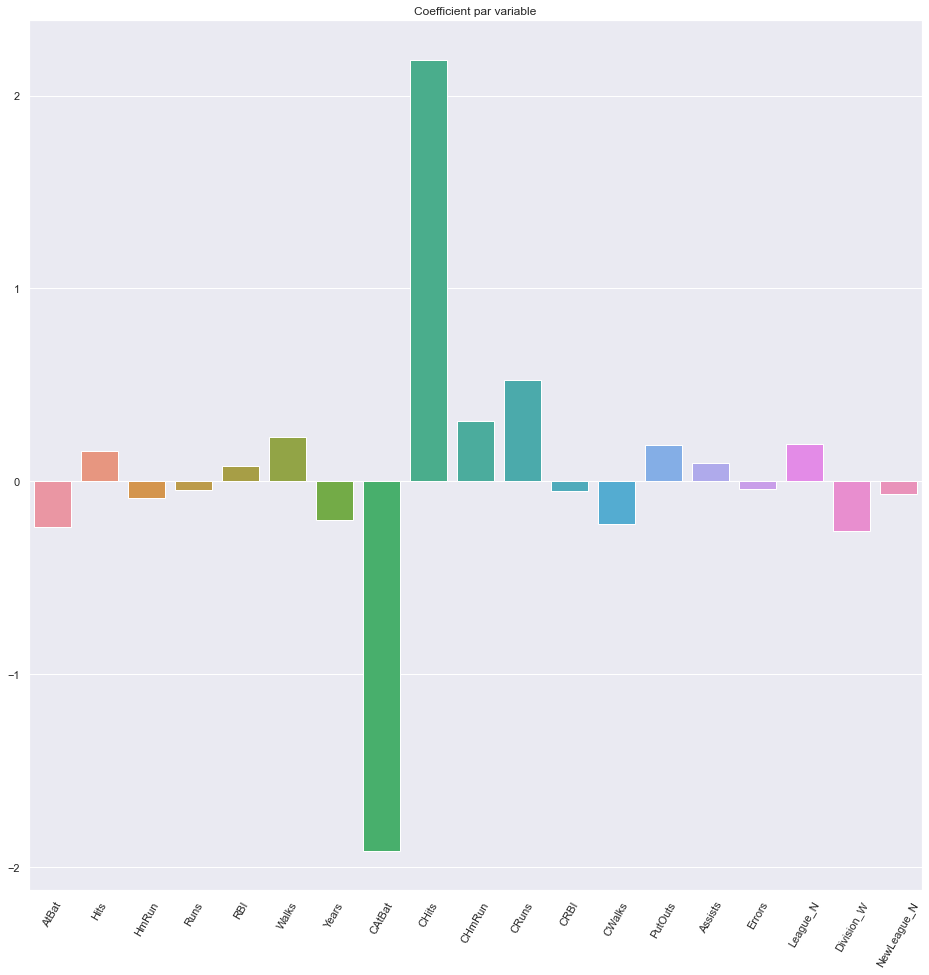

In [9]:
sns.set(rc={'figure.figsize':(16,16)});

p = sns.barplot(X_train.columns, lin_reg.coef_);
plt.xticks(rotation=60);
p.set(title='Coefficient par variable');

## Seconde visualisation :

On peut donc s'intéresser à plusieurs indicateurs :
* Les valeurs réelles
* Les valeurs prédites
* La différence entre les valeurs réelles et les valeurs prédites : cette différence s'appelle les résidus.
* La relation entre les valeurs réelles et les valeurs prédites


> <u>Consignes:</u>
> * Dans un subplot de 2 graphes cotes à cotes tracer (dimension 16*8) : vos graphiques doivent comporter des légendes et titres.
>     * A gauche : Les résidus en fonction des valeurs prédites. Afficher en bleu les valeurs concernant le jeu d'entrainement et en vert les valeurs qui concernent le jeu de test. Ajouter une ligne rouge d'ordonnée 0, entre -1.5 t 4.5.
>     * A droite : Les valeurs réelles en fonction des valeurs prédites. Afficher en bleu les valeurs concernant le jeu d'entrainement et en vert les valeurs qui concernent le jeu de test. Ajouter une ligne rouge de coordonnées `[-1.5, 4.5], [-1.5, 4.5]`.

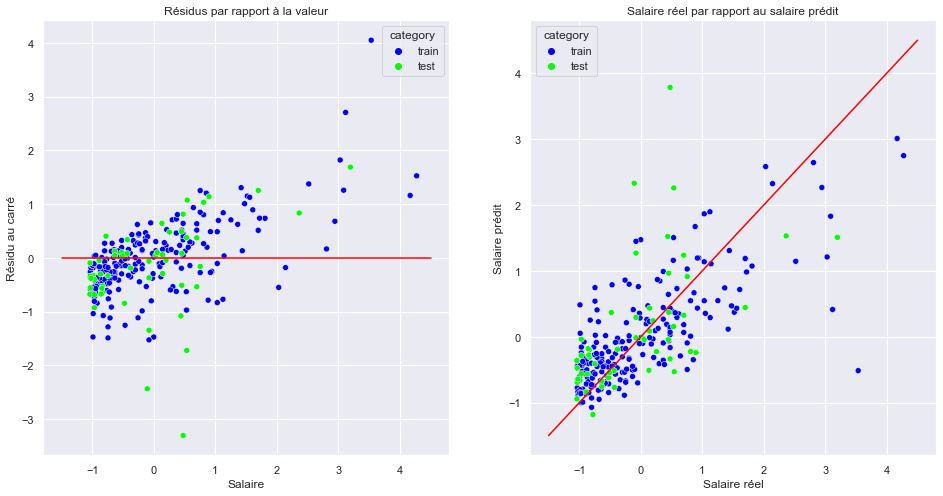

In [10]:
train_residuals = y_train-y_train_pred

test_residuals = y_test-y_test_pred

train_set = pd.DataFrame()
train_set["y"] = y_train
train_set["residuals"] = train_residuals
train_set["category"] = "train"

test_set = pd.DataFrame()
test_set["y"] = y_test
test_set["residuals"] = test_residuals
test_set["category"] = "test"

df2plot1 = train_set.append(test_set)


train_set = pd.DataFrame()
train_set["y"] = y_train
train_set["predicted"] = y_train_pred
train_set["category"] = "train"

test_set = pd.DataFrame()
test_set["y"] = y_test
test_set["predicted"] = y_test_pred
test_set["category"] = "test"

df2plot2 = train_set.append(test_set)


sns.set(rc={'figure.figsize':(16,8)});

fig, ax = plt.subplots(1,2);

sns.lineplot(x = [-1.5,4.5], y = 0, color = "red", ax=ax[0]);

p = sns.scatterplot(data = df2plot1, x="y", y="residuals", ax=ax[0], 
                hue = "category", palette=dict(train="blue", test="lime"));
p.set(title='Résidus par rapport à la valeur', xlabel = "Salaire", ylabel = "Résidu au carré");

sns.lineplot(x = [-1.5,4.5], y = [-1.5,4.5], color = "red", ax=ax[1]);

q = sns.scatterplot(data = df2plot2, x="y", y="predicted", ax=ax[1], 
                hue = "category", palette=dict(train="blue", test="lime"));
q.set(title='Salaire réel par rapport au salaire prédit', xlabel = "Salaire réel", ylabel = "Salaire prédit");

# <font color='orange'>Fin partie</font>


# Passons maintenant à la régularisation Elasticnet

Souvenons nous que nous avons déjà préparé nos données. Elles sont contenues dans les objets X_train, y_train, X_test et y_test.

Encore une fois, la modélisation est assez simple ici...

Deux paramètres sont quand même à mentionner pour la regularisation ElasticNet : <u>L1 ratio et alpha</u> :
* Le **<u>l1_ratio</u>** correspond à la **<font color='red'>balance entre les 2 régularisations (Ridge et Lasso)</font>**. Un l1_ratio égal à 1 correspond donc à une régression Lasso uniquement, et un l1_ratio à 0 correspond à une régression Ridge. Les valeurs entre 0 et 1 correspondent à une combinaison des deux régularisations.
* Le paramètre **<u>alpha</u>** correspond au **<font color='red'>coefficient de pénalité</font>**.

Ces deux paramètres correspondent aux hyperparamètres de notre régression régularisée.


> <u>Consignes:</u>
> * Créer `elasticnet_model` une instance `ElasticNet()` et l'entrainer sur les données d'entrainement. Nous ne préciserons aucun paramètres pour notre instance `ElasticNet()`.
> * Créer un graphique qui permet de visualiser les coefficients obtenus pour chaque variable par notre modèle. Ajouter une ligne verte horizontale d'ordonnée 0.
>
>
> * Que constatez vous ?

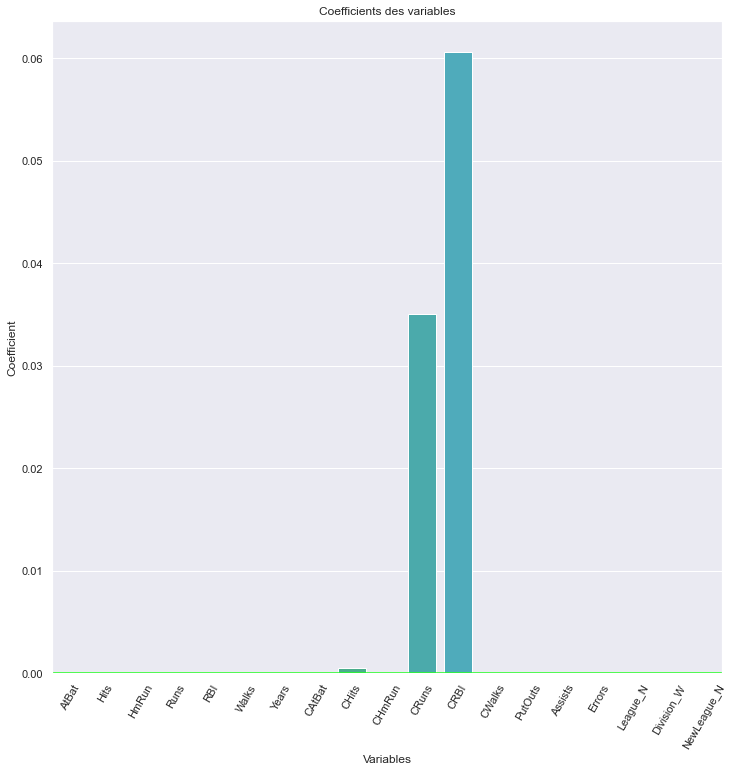

In [11]:
elasticnet_model = ElasticNet()
elasticnet_model.fit(X_train,y_train)


sns.set(rc={'figure.figsize':(12,12)});

p = sns.barplot(x=X_train.columns, y=elasticnet_model.coef_);
p.set(title='Coefficients des variables', xlabel = "Variables", ylabel = "Coefficient");
plt.xticks(rotation=60);
p.axhline(0, color = "lime");

Nous pouvons ici constater que : dans un premier temps, sans optimisation, notre régression régularisée n'a été réalisée qu'avec 3 composantes (dont 1 avec un coefficient très très faible).

## Scoring du modèle.

Reprenons notre phase de scoring.

> <u>Consignes:</u>
> * Créer `y_train_pred1`, les prédictions du modèle `elasticnet_model` sur les donnéees d'entrainement. Vous pouvez utiliser la méthode `.predict()`, et vos données d'entrainement.
> * Créer `y_test_pred1`, les prédictions du modèle `elasticnet_model` sur les donnéees de test. Vous pouvez utiliser la méthode `.predict()`, et vos données de test.
>
>
> * Vient maintenant le moment, de "scorer" nos modèles :
>     * Afficher le **$R^2$** de notre ElasticNet sur le set d'entrainement.
>     * Afficher le **$R^2$** de notre ElasticNet sur le set de test.
>     * Afficher la racine carrée de l'erreur quadratique moyenne (**RMSE**) des prédictions sur le set d'entrainement.
>     * Afficher la racine carrée de l'erreur quadratique moyenne (**RMSE**) des prédictions sur le set de test.
>
>
> * Que constatez vous ?

In [12]:
y_train_pred1 = elasticnet_model.predict(X_train)
y_test_pred1 = elasticnet_model.predict(X_test)

print("Le score de X_train est : {}".format(elasticnet_model.score(X_train, y_train)))
print("Le score de X_test est : {}".format(elasticnet_model.score(X_test,y_test)))

print("\n")

print("La RMSE de X_train est : {}".format(mean_squared_error(y_train_pred1, y_train)**0.5))
print("La RMSE de X_test est : {}".format(mean_squared_error(y_test_pred1,y_test)**0.5))

Le score de X_train est : 0.10318641865786327
Le score de X_test est : 0.07084748195930768


La RMSE de X_train est : 0.9740119689654718
La RMSE de X_test est : 0.8429178889779304


Ici, nous pouvons constater : 
* <u>surtout</u> une diminution très importante de l'écart entre le $R^2$ sur le set d'entrainement et le set de test.
* Mais nous avons également une chutte important du $R^2$ sur le set d'entrainement

Nous voyons la conséquence de la régularisation : nous avons empeché le suraprrentissage !


# <font color='orange'>Fin partie</font>


-----

# Ajustement du modèle

Vient maintenant le moment d'ajuster le modèle, c'est à dire essayer d'optimiser les hyperparamètres.

Vous aurez l'occasion de le voir plus tard, on utilise en général 2 méthodes complémentaires, **la GridSearch et la validation croisée**.

**<u>Validation croisée</u>** :

![validation_croisee.png](https://stanford.edu/~shervine/teaching/cs-229/illustrations/cross-validation-fr.png?387f93447341a16335e54f5a422b4931)

Scikit-learn dispose d'un package particulier qui a l'avanage de combiner l'ensemble de ces fonctions : `ElasticNetCV()` que nous avons importé au début de cet exercice.

Les paramètres pricipaux à indiquer à `ElasticNetCV()` :
* l1_ratio : valeurs possibles que l'on souhaite tester pour la balance de régularisation entre Ridge et Lasso.
* alphas : valeurs possibles que l'on souhaite tester pour le coefficient de pénalité.
* cv : le nombre d'étapes de validations croisées souhaitées.


> <u>Consignes:</u>
> * Créer `l1_values`, une liste comprenant les valeurs `0.1, 0.25, 0.35, 0.5, 0.7, 0.8, 0.9, 0.99`.
> * Créer `alpha_values`, une liste comprenant les valeurs `0.001, 0.005, 0.01, 0.02, 0.025, 0.05, 0.1, 0.25, 0.4, 0.5, 0.65, 0.8, 1.0`.
>
>
> * Créer `elasticnet_model_cv`, une instance `ElasticNetCV()`. Nous allons spécifier les paramètres qui nous intéressent :
>     * `l1_ratio` doit prendre les valeurs de `l1_values`
>     * `alphas` doit prendre les valeurs de `alpha_values`
>     * `cv` sera à 10.
> * Entrainer `elasticnet_model_cv` sur les données d'entrainement (à l'aide de la méthode `.fit()`
>
>
> * Nous allons procéder à l'étude de la constante de la régression et des coefficients de la regression, un peu différemment de ce que nous avons fait jusqu'à présent :
>     * Créer `coeffs`, une liste contenant les coefficients de notre modèle entrainé `elasticnet_model_cv`.
>     * Dans cette liste, insérer en position 0 la constante de régression.
>     * Créer `feats`, une liste contenant le nom des colonnes de dotre dataframe `data`
>     * Dans cette liste, insérer en position 0 le nom `'intercept'`.
>     * Créer `tempo_coeffs`, une dataframe ayant une colonne nommée `valeur estimée` contenant notre liste `coeffs` et ayant pour indexes notre liste `feats`.
>     * Ensuite créer un graphique en bar à l'aide de la df `tempo_coeffs`. (N'oubliez pas les titres et légendes des axes...).

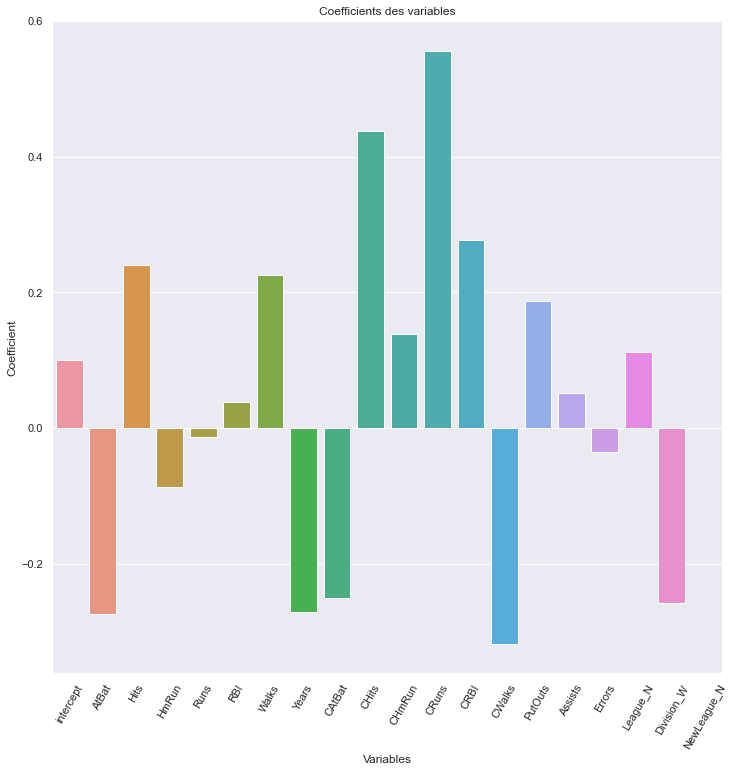

In [13]:
l1_values = [0.1, 0.25, 0.35, 0.5, 0.7, 0.8, 0.9, 0.99]
alpha_values = [0.001, 0.005, 0.01, 0.02, 0.025, 0.05, 0.1, 0.25, 0.4, 0.5, 0.65, 0.8, 1.0]

elasticnet_model_cv = ElasticNetCV(l1_ratio=l1_values, alphas=alpha_values, cv=10)
elasticnet_model_cv.fit(X_train,y_train)

coeffs = list(elasticnet_model_cv.coef_)
coeffs.insert(0, elasticnet_model_cv.l1_ratio_)

feats = list(X_train.columns)
feats.insert(0,"intercept")

tempo_coeffs = pd.DataFrame(data=coeffs, columns=["valeur estimée"], index=feats)

p = sns.barplot(x=tempo_coeffs.index, y=tempo_coeffs["valeur estimée"]);
plt.xticks(rotation=60);
p.set(title='Coefficients des variables', xlabel = "Variables", ylabel = "Coefficient");

Nous pouvons constater que la regression n'a plus rien à voire avec la régression précédente ! Les coefficients ne sont plus du tout les mêmes !

----


## Comment évolue la MSE au cours de la recherche de paramètres ?

Afin de répondre à cette question, nous allons nous appuyer sur un attribu des instances `ElasticNetCV()` : l'attribut `.mse_path_`.
Cette attribut est un array de dimension (n_l1_ratio, n_alpha, n_folds). Il contient la MSE calculée sur les données lors de l'entrainement, à chaque validation croisée, en faisant varier le l1_ratio et alpha. Par exemple, si l'on cherche la dimension de `elasticnet_model_cv`, notre cas particulier renverra `(8, 13, 10)` (nous avons en effet testé 8 valeurs différentes de l1_ratio, 13 alphas et 10 cross validations).

Ainsi, pour le premier l1_ratio, si l'on s'intéresse à l'objet `.mse_path_[1,:,:]`, nous obtiendrons un array de 13 "lignes" de 10 "colonnes" chaccunes. chacune des valeurs correspond à la MSE obtenue de la régression.


> <u>Consignes:</u>
> * Créer un array `alphas`, contenant les valeurs d'alphas employées pendant la recherche d'hyperparamètres. L'attribut `.alphas_` pourrait être utile ici...
> * Créer une figure de dimension (14, 10) qui contiendra :
>     * Pour chaque l1_ratio testé :
>         * une courbe de la **<font color='red'>moyenne</font>** des valeurs de MSE en fonction des alphas. Rappelons que les valeurs de MSE sont accessibles grace à l'attribut `.mse_path_` de notre modèle.
>         * Ajouter une légende qui indique le l1_ratio de la courbe correspondante.
>         * N'oubliez pas les titres des exes et du graphique.

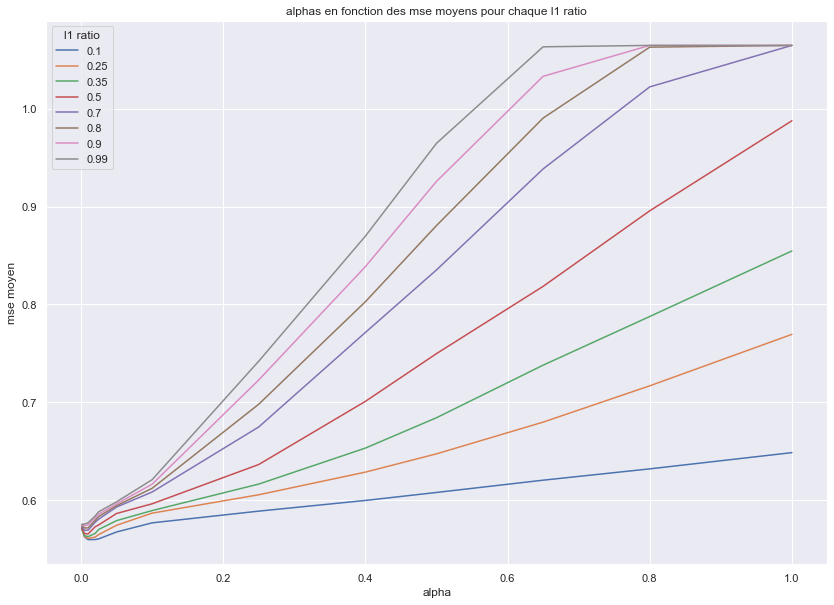

In [14]:
alphas = elasticnet_model_cv.alphas_

sns.set(rc={'figure.figsize':(14,10)});

for i in range(elasticnet_model_cv.mse_path_.shape[0]) :
    p = sns.lineplot(x=alphas, y=elasticnet_model_cv.mse_path_[i,:,:].mean(axis=1));
    
p.set(title='alphas en fonction des mse moyens pour chaque l1 ratio'
      , xlabel="alpha"
     ,ylabel="mse moyen");
plt.legend(title="l1 ratio" ,labels=elasticnet_model_cv.l1_ratio);

Nous pouvons donc observer que la MSE augmente assez rapidement à mesure que alpha augmente. De même, les ratios l1 faibles semblent favoriser une erreur plus faible. Ainsi, la régularisation Lasso ne prend donc que peu d'espace dans notre regression régularisée.

## Quels sont les paramètres optimaux retenus ?

Cette fois encore, nous pouvons compter sur scikit-learn ! En effet, l'instance `ElasticNetCV()` possède notamment 2 attribus : 
* `.alpha_` (attention à l'orthographe, c'est différent de l'attribut `.alphas_` avec un s !) : correspond à la pénalisation optimale choisie pendant le processus d'optimisation/validation croisée.
* `.l1_ratio_` : correspond au compromis entre la régularisation Lasso (= 1) et Ridge (= 0) optimale choisi pendant le processus d'optimisation/validation croisée.


> <u>Consignes:</u>
> * Afficher le paramètre `alpha` optimal choisi pendant le processus d'optimisation/validation croisée.
> * Afficher le paramètre `l1_ratio` optimal choisi pendant le processus d'optimisation/validation croisée.

In [15]:
print("L'alpha optimal est : {}".format(elasticnet_model_cv.alpha_))
print("Le ratio l1 optimal est : {}".format(elasticnet_model_cv.l1_ratio_))

L'alpha optimal est : 0.01
Le ratio l1 optimal est : 0.1


Nous pouvons donc confirmer nos hypothèses émises précédemment avec le graph : de faibles paramètres alpha et l1_ratio permettent d'obtenir les meilleures erreurs.

# <font color='orange'>Fin partie</font>

---

# Voyons finalement les scores de notre modélisation !

Nous allons donc finalement nous intéresser aux score obtenu par notre modélisation.
Nous allons aussi regarder la différence en entre la réalité et les prédictions.

Nous avions précédemment abordé la notion de moyenne et d'échelle relative lors de la standradisation des données. Ainsi, à partir d'une valeur standardisée, pour retrouver une valeur, il suffit de la multiplier par l'échelle relative et d'ajouter au résultat la moyenne de la variable d'intérêt.


<u>Consignes:</u>
* Créer `y_pred_train1` les prédictions de notre modèle `elasticnet_model_cv` à partir des données d'entrainement.
* Créer `y_pred_test1` les prédictions de notre modèle `elasticnet_model_cv` à partir des données de test.


* Créer et afficher `moyenne_val` la moyenne des salaires utilisée par de notre `StandardScaler()` initial que nous avons entrainé pour standradiser les données. Souvenez vous de ce que nous avons vu précédemment..!
* Créer et afficher `rel_scale` l'échelle relative des salaires utilisée par de notre `StandardScaler()` initial que nous avons entrainé pour standradiser les données.


* Afficher la **RMSE** obtenue à partir de nos données d'entrainement
* Afficher la **RMSE** obtenue à partir de nos données de test


* Afficher le **$R^2$** obtenue à partir de nos données d'entrainement
* Afficher le **$R^2$** obtenue à partir de nos données de test


* Finalement, nous allons nous servir des `moyenne_val` et `rel_scale` afin de créer et d'afficher (pour les **10** premières valeurs) du jeu de test : dans une première colonne, le salaire réel, dans une seconde colonne, le salaire prédit et dans une troisième colonne, la différence entre le prédit et le réel.

In [16]:
y_pred_train1 = elasticnet_model_cv.predict(X_train)
y_pred_test1 = elasticnet_model_cv.predict(X_test)

moyenne_val = scaler.mean_[-1]

rel_scale = scaler.scale_[-1]
print("Moyenne pour le scaler : {}".format(rel_scale))
print("Echelle relative pour le scaler : {}".format(rel_scale))

print("\n")

print("Le score de X_train est : {}".format(elasticnet_model.score(X_train, y_train)))
print("Le score de X_test est : {}".format(elasticnet_model.score(X_test,y_test)))

print("\n")

print("La RMSE de X_train est : {}".format(mean_squared_error(y_pred_train1, y_train)**0.5))
print("La RMSE de X_test est : {}".format(mean_squared_error(y_pred_test1,y_test)**0.5))

print("\n")

pd.DataFrame({"Salaire réel":(y_test*rel_scale+moyenne_val), "Salaire prédit":(y_pred_test1*rel_scale+moyenne_val), 
              "Différence":(y_test*rel_scale+moyenne_val)-(y_pred_test1*rel_scale+moyenne_val)}).head(10)

Moyenne pour le scaler : 450.26022382434286
Echelle relative pour le scaler : 450.26022382434286


Le score de X_train est : 0.10318641865786327
Le score de X_test est : 0.07084748195930768


La RMSE de X_train est : 0.6769236762582321
La RMSE de X_test est : 0.800596078381326




,Salaire réel,Salaire prédit,Différence
30,90.0,228.015838,-138.015838
72,595.0,267.320641,327.679359
254,550.0,494.208070,55.791930
167,68.0,110.046219,-42.046219
203,250.0,197.200793,52.799207
198,560.0,502.263573,57.736427
85,900.0,493.107214,406.892786
251,160.0,533.572469,-373.572469
24,625.0,631.881627,-6.881627
42,340.0,303.020607,36.979393


Bon... pas de miracles... c'était prévisible ! N'oubliez pas que nous ne disposons même pas de 300 enregistrements. Grâce à cela, les calculs sont instantannés, néanmoins, c'est au prix de performances fortement diminuées.

Néanmoins, s'il ne devait y avoir qu'une seule chose à retenir ici, c'est la comparaison entre le $R^2$ test initial et le final (0.03 vs 0.16). 0.16 reste ridiculement bas, Cependant, nous avons considérablement diminué l'écart en le train et le test, indiquant une diminution du sur-apprentissage. Loin d'être suffisante mais qui existe quand même.

## Re-visualisons les graphs

> <u>Consignes:</u>
> * Dans un subplot de 4 graphes (dimension 16*16) tracer : vos graphiques doivent comporter des légendes et titres.
>     * En haut (**données standardisées**):
>         * A gauche : Les résidus en fonction des valeurs prédites. Afficher en bleu les valeurs concernant le jeu d'entrainement et en vert les valeurs qui concernent le jeu de test. Ajouter une ligne rouge d'ordonnée 0, entre -1.5 et 4.5.
>         * A droite : Les valeurs réelles en fonction des valeurs prédites. Afficher en bleu les valeurs concernant le jeu d'entrainement et en vert les valeurs qui concernent le jeu de test. Ajouter une ligne rouge de coordonnées `[-1.5, 4.5], [-1.5, 4.5]`.
>     * En bas (**données non standardisées**):
>         *  A gauche : Les résidus en fonction des valeurs prédites. Afficher en bleu les valeurs concernant le jeu d'entrainement et en vert les valeurs qui concernent le jeu de test. Ajouter une ligne rouge d'ordonnée (moyenne+échelle relative), entre 0 et 2500.
>         * A droite : Les valeurs réelles en fonction des valeurs prédites. Afficher en bleu les valeurs concernant le jeu d'entrainement et en vert les valeurs qui concernent le jeu de test. Ajouter une ligne rouge de coordonnées `[0, 2500], [0, 2500]`.



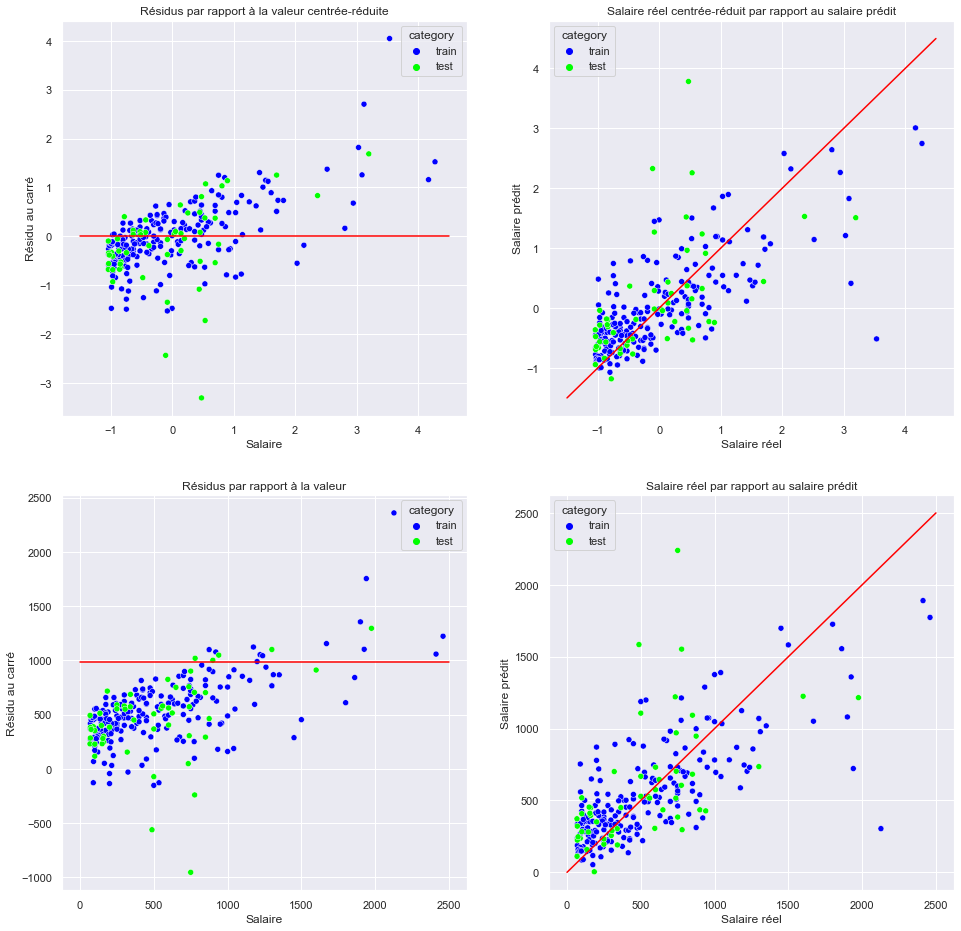

In [18]:
sns.set(rc={'figure.figsize':(16,16)});

fig, ax = plt.subplots(2,2);

# Données standardisées

sns.lineplot(x = [-1.5,4.5], y = 0, color = "red", ax=ax[0,0]);

p = sns.scatterplot(data = df2plot1, x="y", y="residuals", ax=ax[0,0], 
                hue = "category", palette=dict(train="blue", test="lime"));
p.set(title='Résidus par rapport à la valeur centrée-réduite', xlabel = "Salaire", ylabel = "Résidu au carré");

sns.lineplot(x = [-1.5,4.5], y = [-1.5,4.5], color = "red", ax=ax[0,1]);

q = sns.scatterplot(data = df2plot2, x="y", y="predicted", ax=ax[0,1], 
                hue = "category", palette=dict(train="blue", test="lime"));
q.set(title='Salaire réel centrée-réduit par rapport au salaire prédit', xlabel = "Salaire réel", ylabel = "Salaire prédit");

# Données non standardisées

df2plot3 = df2plot1.copy()
for i in df2plot3.columns[:-1] :
    df2plot3[i] = df2plot3[i].apply(lambda x: x*rel_scale+moyenne_val)


df2plot4 = df2plot2.copy()
for i in df2plot4.columns[:-1] :
    df2plot4[i] = df2plot4[i].apply(lambda x: x*rel_scale+moyenne_val)
    
sns.lineplot(x = [0, 2500], y = moyenne_val+rel_scale, color = "red", ax=ax[1,0]);

p = sns.scatterplot(data = df2plot3, x="y", y="residuals", ax=ax[1,0], 
                hue = "category", palette=dict(train="blue", test="lime"));
p.set(title='Résidus par rapport à la valeur', xlabel = "Salaire", ylabel = "Résidu au carré");

sns.lineplot(x = [0, 2500], y = [0, 2500], color = "red", ax=ax[1,1]);

q = sns.scatterplot(data = df2plot4, x="y", y="predicted", ax=ax[1,1], 
                hue = "category", palette=dict(train="blue", test="lime"));
q.set(title='Salaire réel par rapport au salaire prédit', xlabel = "Salaire réel", ylabel = "Salaire prédit");


# <font color='orange'>Fin partie</font>

---

# Passons à la classification :

Il est possible de concervoir la classification comme une régression spécifiquement réalisée sur des valeurs qualitatives et non quantitatives (comme la régression).

**Encore une fois, je ne pourrais que vous conseiller, d'aller faire un tour sur [cette page](https://stanford.edu/~shervine/l/fr/teaching/cs-229/) ! Beaucoup de très bonnes informations.**

Pour commencer, une petite nuance : en cas d'apprentissage supervisé, on parle plutot de classifcation. En cas d'apprentissage non supervisé, on parle de clustering.
Quelle est la différence entre l'apprentissage supervisé ou non :
* Apprentissage supervisé : les données d'entrainement sont labélisées : on connait donc leur classe à l'avance !
* Apprentissage non supervisé : les données d'entrainement ne sont pas labélisées : on ne connait donc pas leur classe à l'avance ! C'est à l'algorithme d'essayer de :
    1. minimiser la différence entre les membres d'un même groupe,
    2. maximiser la différence entre les individus de 2 groupes différents.

Pour faire suite à la regression que nous venons d'aborder, le premier modèle de classification que nous pouvons mentionner est la regression logistique.


---

Nous n'allons pas faire le point sur tous les modèles de classification qui existent... ils sont nombreux. Ils sont aussi très divers, et se basent sur des principes souvent différents. Leur complexité varie elle aussi beaucoup. Les classifieurs les plus simples sont en règle général les plus explicables : en tant qu'humain, nous sommes en mesure de comprendre quelles sont les règles qui assurent la classification. Par ailleurs ces modèles simples sont aussi souvent limités dans leur pouvoir de prédictions. A l'inverse, il existe des modèles de classification plus avancés, plus complexes et parallèlement beacoup moins explicables. Hors, l'interprétabilité d'un modèle est parfois cruciale pour le business.

De même nous ne pourrons pas voir des exemples de 50 modèles différents. L'objectif ici étant d'aborder les algorythmes simples mais aussi ceux plus complexes (avec les principes de **bagging/boosting** : les méthodes ensemblistes).

Les méthodes ensemblistes (ou d’agrégation) pour les algorithmes d’apprentissage statistique (en anglais : *ensemble learning*) sont basées sur l’idée de combiner les prédictions de plusieurs prédicteurs (ou classifieurs) pour une meilleure généralisation et pour compenser les défauts éventuels de prédicteurs individuels.

En général, on distingue deux familles de méthodes de ce type :
1. Méthodes par moyennage (bagging, forêts aléatoires) où le principe est de faire la moyenne de plusieurs prédictions en espérant un meilleur résultat suite à la réduction de variance de l’éstimateur moyen.
2. Méthodes adaptatives (boosting) où les paramètres sont itérativement adaptés pour produire un meilleur mélange.

Nous avons déjà vu un exemple de classification simple : la classification par SVM, nous ne reviendrons pas spécialement dessus (simplement indiquer qu'il sont considérés comme classifieurs faibles).


--------------------------------------------

<u>Nous allons commencer avec les arbres de décision :</u>

**<font color='red'>CART</font>** - Les arbres de classification et de régression (en anglais CART - _**C**lassification **A**nd **R**egression **T**rees_), aussi connus sous le nom d'arbres de décision, peuvent être représentés sous la forme d'arbres binaires. Ils ont l'avantage d'être très interprétables !

En théorie des graphes, un arbre est un graphe non orienté, acyclique et connexe. L’ensemble des nœuds se divise en trois catégories :
* Nœud racine (l’accès à l’arbre se fait par ce nœud),
* Nœuds internes : les nœuds qui ont des descendants (ou enfants), qui sont à leur tour des nœuds,
* Nœuds terminaux (ou feuilles) : nœuds qui n’ont pas de descendant.

Un arbre de décision peut être décrit comme une représentation visuelle d’un algorithme de classification. Il s'agit de suivre différents critères de décision ces critères peuvent être appelés noeuds. 

Chaque noeud correspond à un test sur une variable d'apprentissage, et chacune des branches suivantes représente un résultat de ce test. Au bout de l'arbre de décision on retrouve des feuilles aussi appelées noeuds terminaux. Ces feuilles contiennent un label cible.

L'arbre de décision permet, après entraînement sur un ensemble de données, d'effectuer facilement des prédictions sous la forme de règles logiques successives de classification. Les résultats sont ainsi facilement interprétables et donc exploitables, la communication autour de la modélisation plus aisée. C'est donc un classifieur très apprécié et utilisé en entreprise.

La construction d'un arbre de décision se fait en principe en 2 phases:
1. <u>Construction des noeuds :</u> À partir d'un ensemble d'apprentissage, les données sont divisés en sous échantillons de plus en plus pures en terme de classes, sur la base d'un critère prédéfini. Le problème de classification est ainsi décomposé en une suite de tests (imbriqués) portant sur une variable, de type "$X \ge seuil$". Sur chaque noeud, le meilleur test est sélectionné. L'objectif est souvent de diminuer le plus possible le mélange des classes au sein de chaque sous-ensemble créé par les différentes alternatives du test. En découle une succession de règles de classifications sous forme d'arbre dont chaque extrémité indique l'appartenance à une classe. **La classe allouée à une feuille est déterminée par la classe majoritairement représentée parmi les données de l'ensemble d'apprentissage** qui "tombent" dans cette feuille. L'objectif est donc de construire une séquence hiérarchique de tests aussi courte que possible, qui divise l'ensemble des données d'apprentissage en sous-ensembles qui premettent de détecter la classe.
2. <u>Phase d'élagage (ou "pruning") :</u> Elle consiste en la suppression des branches peu représentatives pour garder de bonnes performances prédictives. Cette étape nécessite la création d'un critère/ d'une métrique pour désigner les branches à élaguer, qui dépendera de l'algorithme utilisé. Après élagage, les branches sont remplacées par des noeuds terminaux, labellisées sur base de la présence de la classe majoritaire. De manière générale, le pruning se fait du bas vers le haut de l'arbre ("bottom-up"). Il se base sur une estimation du taux d'erreur de classification. Un arbre est élagué à un certain nœud si le taux d'erreur estimé à ce nœud (en y allouant la classe majoritaire) est inférieur au taux d'erreur obtenu en considérant les sous-arbres terminaux. L'élagage se prolonge successivement (au départ des extrémités) jusqu'à ce que tous les sous-arbres restants satisfassent la condition sur les taux d'erreur de classification.

Les algorithmes basés sur les arbres de décision permettent de répondre simplement et rapidement à un problème de classification. Ils ne formulent pas d'hypothèses au sujet des données et ne sont pas affectés par les problèmes d'échelles de mesure des variables. 
Ils peuvent gérer à la fois des variables numériques et catégorielles, et s'avèrent facilement interprétables.

Les modèles à base d'arbres de décision peuvent s'avérer cependant assez instables : ils sont sensibles aux variations (même assez faibles) de l'ensemble d'apprentissage en terme d'échantillons ou de variables considérées. Parfois, les arbres de décision sont également très complexes, et généralisent mal l'ensemble d'apprentissage (surapprentissage, *overfitting* en anglais). Des procédures d'élagage supplémentaires sont utilisées pour contourner ce problème, certaines approches comme les **forêts aléatoires** permettent de s'en affranchir.

## Positionnons le problème :

Qui ne connait pas le le titanic ?
<u>Objectif :</u> A partir d'un jeu données, prédire qui va survivre. Les données sont composées de :
- **PassengerId**, le numéro du passager
- **Survived**, si 1 le passager a survécu, 0 sinon (ce sont les données que nous devons prédire)
- **Pclass**, la classe du passager 1 étant la meilleur, 3 la moins bonne
- **Name**, le nom du passager
- **Sex**, le sexe de l'individu
- **Age**, l'âge du passager
- **SibSp**, nombre de frère et sœur du passager à bord du Titanic
- **Parch**, nombre de parents du passager à bord du Titanic
- **Ticket**, le numéro du Ticket
- **Fare**, prix du Ticket
- **Cabin**, le numéro de cabine
- **Embarked**, port d'embarcation C pour Cherbourg, Q pour Queenstown, S pour Southampton


> <u>Consignes:</u>
> * Importer le jeu de données nommé `titanic_classif_CNAM.csv`.
> * Afficher les **5** premières lignes.
> * Afficher le résumé de nos données à l'aide de la fonction `resumetable` que nous avions créé il y a quelques semaines.

In [21]:
dftit = pd.read_csv("titanic_classif_CNAM.csv", sep = ",", header = 0)

display(dftit.head(5))
resumetable(dftit)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Format de la base : (891, 12)


,type,nb_nan,nb_unique,v1,v2,v3
PassengerId,int64,0,891,1,2,3
Survived,int64,0,2,0,1,1
Pclass,int64,0,3,3,1,3
Name,object,0,891,"Braund, Mr. Owen Harris","Cumings, Mrs. John Bradley (Florence Briggs Th...","Heikkinen, Miss. Laina"
Sex,object,0,2,male,female,female
Age,float64,177,88,22.0,38.0,26.0
SibSp,int64,0,7,1,1,0
Parch,int64,0,7,0,0,0
Ticket,object,0,681,A/5 21171,PC 17599,STON/O2. 3101282
Fare,float64,0,248,7.25,71.2833,7.925


# Interessons nous au label...

> <u>Consignes :</u>
> * Afficher le nombre de passagers qui ont survécu (label 1) et le nombre qui n'ont pas survécu (label 0).
> * A l'aide des techniques de dataviz précédemment vues, en faire un représentation visuelle.

In [22]:
dftit[dftit["Survived"] == 1].shape[0]

342

# Préparons les données :

Soyons originaux.... et.... préparons nos données ! et oui, c'est la rangaine, à chaque fois..!

> <u>Consignes:</u>
> * Créer `tit_target` contenant les valeurs cibles à prédire : est ce que le passager à survécu ou non?
> * Supprimer la variable cible de `dftit`.
> * Nos varaibles catégorielles sont notamment les variables : `Embarked`, `Sex` et `Cabin`. **Dichotomisez** ces variables dans une dataframe nommée `dftit_cat` afin qu'elles ne soient plus perçues par le modèle comme une variable catégorielle.
> * Re-créer un dataset complet nommé `dftit_new` en combinant les variables que nous venons de créer (`dftit_cat`) et les variables initiales `Pclass`, `Age`, `SibSp` et `Parch` de `dftit`.
> * Afficher les 5 premières lignes de `dftit_new`.

In [23]:
tit_target = dftit["Survived"]
dftit = dftit.drop(columns=["Survived"])
dftit_cat = pd.get_dummies(dftit[["Embarked", "Sex", "Cabin"]])

dftit_new = pd.concat([dftit[["Pclass", "Age", "SibSp", "Parch"]],dftit_cat], axis=1)

dftit_new.head(5)


,Pclass,Age,SibSp,Parch,Embarked_C,Embarked_Q,Embarked_S,Sex_female,Sex_male,Cabin_A10,Cabin_A14,Cabin_A16,Cabin_A19,Cabin_A20,Cabin_A23,Cabin_A24,Cabin_A26,Cabin_A31,Cabin_A32,Cabin_A34,Cabin_A36,Cabin_A5,Cabin_A6,Cabin_A7,Cabin_B101,Cabin_B102,Cabin_B18,Cabin_B19,Cabin_B20,Cabin_B22,Cabin_B28,Cabin_B3,Cabin_B30,Cabin_B35,Cabin_B37,Cabin_B38,Cabin_B39,Cabin_B4,Cabin_B41,Cabin_B42,Cabin_B49,Cabin_B5,Cabin_B50,Cabin_B51 B53 B55,Cabin_B57 B59 B63 B66,Cabin_B58 B60,Cabin_B69,Cabin_B71,Cabin_B73,Cabin_B77,Cabin_B78,Cabin_B79,Cabin_B80,Cabin_B82 B84,Cabin_B86,Cabin_B94,Cabin_B96 B98,Cabin_C101,Cabin_C103,Cabin_C104,...,Cabin_C93,Cabin_C95,Cabin_C99,Cabin_D,Cabin_D10 D12,Cabin_D11,Cabin_D15,Cabin_D17,Cabin_D19,Cabin_D20,Cabin_D21,Cabin_D26,Cabin_D28,Cabin_D30,Cabin_D33,Cabin_D35,Cabin_D36,Cabin_D37,Cabin_D45,Cabin_D46,Cabin_D47,Cabin_D48,Cabin_D49,Cabin_D50,Cabin_D56,Cabin_D6,Cabin_D7,Cabin_D9,Cabin_E10,Cabin_E101,Cabin_E12,Cabin_E121,Cabin_E17,Cabin_E24,Cabin_E25,Cabin_E31,Cabin_E33,Cabin_E34,Cabin_E36,Cabin_E38,Cabin_E40,Cabin_E44,Cabin_E46,Cabin_E49,Cabin_E50,Cabin_E58,Cabin_E63,Cabin_E67,Cabin_E68,Cabin_E77,Cabin_E8,Cabin_F E69,Cabin_F G63,Cabin_F G73,Cabin_F2,Cabin_F33,Cabin_F38,Cabin_F4,Cabin_G6,Cabin_T
0,3,22.0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1,38.0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,3,26.0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,1,35.0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,3,35.0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


# <font color='orange'>Fin partie</font>

---

# Changeons un peu...

Une question se pose.... une fois de plus !!
Avons nous des valeurs manquantes ?
Voyons une manière un peu plus visuelle de représenter les choses.

> <u>Consignes :</u>
> * Instancier une figure de dimension 10,5.
> * Créer une représentation graphique à l'aide de la fonction `heatmap` de seaborn. Pour cela, il suffit d'indiquer en argument data `dftit.isnull()`. Pour agrémenter les choses il est possible de préciser `viridis` pour la color map (`cmap`), enlever la barre latérale et les y ticks.
> * Indiquer un titre.

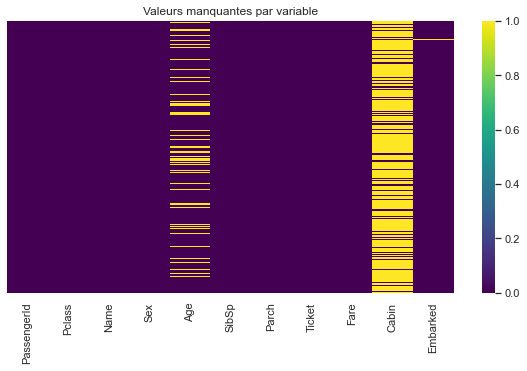

In [28]:
sns.set(rc={'figure.figsize':(10,5)});

sns.heatmap(dftit.isnull(), cmap="viridis");
plt.yticks([]);
plt.title("Valeurs manquantes par variable");

# Réglons ce soucis de NaN...

Pour régler le problème de NaN, nous pouvons imposer de les remplacer par des 0.

> <u>Consignes :</u>
> * Remplacer les NaN par des 0.
> * Créer `test00` une df résultant de la fonction `resumetable`sur `dftit_new`.
> * Afficher les **10 dernières** lignes de `test00`.

In [37]:
dftit_new = dftit_new.fillna(0)

test00 = resumetable(dftit_new)

display(test00.tail(10))

Format de la base : (891, 156)


,type,nb_nan,nb_unique,v1,v2,v3
Cabin_E8,uint8,0,2,0.0,0.0,0.0
Cabin_F E69,uint8,0,2,0.0,0.0,0.0
Cabin_F G63,uint8,0,2,0.0,0.0,0.0
Cabin_F G73,uint8,0,2,0.0,0.0,0.0
Cabin_F2,uint8,0,2,0.0,0.0,0.0
Cabin_F33,uint8,0,2,0.0,0.0,0.0
Cabin_F38,uint8,0,2,0.0,0.0,0.0
Cabin_F4,uint8,0,2,0.0,0.0,0.0
Cabin_G6,uint8,0,2,0.0,0.0,0.0
Cabin_T,uint8,0,2,0.0,0.0,0.0


## Séparation des données de travail

> <u>Consignes :</u>
> * Séparer nos données en `X_train_tit`, `X_test_tit`, `y_train_tit` et `y_test_tit` à partir de `dftit_new` et `tit_target`. Les données de test devront représenter 20%. Fixer l'état aléatoire à 432.

In [38]:
X_train_tit, X_test_tit, y_train_tit, y_test_tit = train_test_split(dftit_new, tit_target, test_size=0.2, random_state=432)

# <font color='orange'>Fin partie</font>

---

# Classi.... classi.... classifions !

Maintenant que les données sont préparées, nous pouvons passer à l'étape de la classification !

> <u>Consignes :</u>
> * Importer la fonction `DecisionTreeClassifier` du package `sklearn.tree`.
> * Instancier un classifieur `DecisionTreeClassifier` nommé `model_tree`. Spécifier les arguments : `"entropy"` pour le critère, une profondeure maximale de **8**, et un état aléatoire fixé à **861**.
> * Entrainer le classifier `model_tree` à partir des données d'entrainement (`X_train_tit`, `y_train_tit`)

In [39]:
from sklearn.tree import DecisionTreeClassifier

model_tree = DecisionTreeClassifier(criterion="entropy", max_depth=8, random_state=861)

model_tree.fit(X_train_tit,y_train_tit)

DecisionTreeClassifier(criterion='entropy', max_depth=8, random_state=861)

# Evaluations

Nous allons maintenant passer à l'évaluation de notre modèle. Dans un premier temps, nous allons nous focaliser sur la matrice de confusion. Nous avons déjà vu une manière de les produire. Nous allons essayer une autre fonction : `.crosstab()` de pandas. De la même manière que pour la fonction `.confusion_matrix()` de `sklearn.metrics` que nous avons vu précédemment, `.crosstab()` prend aussi comme arguments les labels réeles, puis les labels prédits par le modèle afin de les comparer.

> <u>Consignes :</u>
> 1. Prédire les données :
>     * A l'aide de la fonction `.predict(*dataset*)` de notre modèle `model_tree`, prédire les résultats issus du **set d'entrainement** dans un objet nommé `y_pred_tree`.
>     * A l'aide de la fonction `.predict(*dataset*)` de notre modèle `model_tree`, prédire les résultats issus du **set de test** dans un objet nommé `y_pred_tree1`.
>
>
> 2. Créer les matrices de confusion :
>     * Créer `cm_tree`, une matrice de confusion issue de la fonction `.crosstab()` sur les prédictions de notree **set d'entrainement**. Les arguments seront donc les labels réeles, puis les labels prédits par le modèle. On ajoutera les arguments `rownames=['Classe réelle (train)']`, `colnames=['Classe prédite (train)']` et `margins=True`.
>     * Créer `cm_tree1`, une matrice de confusion issue de la fonction `.crosstab()` sur les prédictions de notree **set de test**. Les arguments seront donc les labels réeles, puis les labels prédits par le modèle. On ajoutera les arguments `rownames=['Classe réelle (train)']`, `colnames=['Classe prédite (train)']` et `margins=True`.
>
>
> 3. Afficher les résultats :
    * Afficher les objets `cm_tree` et `cm_tree1`.


In [47]:
y_pred_tree = model_tree.predict(X_train_tit)
y_pred_tree1 = model_tree.predict(X_test_tit)

cm_tree = pd.crosstab(y_train_tit,y_pred_tree,rownames=['Classe réelle (train)'], 
                      colnames=['Classe prédite (train)'], margins=True)

cm_tree1 = pd.crosstab(y_test_tit,y_pred_tree1,rownames=['Classe réelle (test)'], 
                      colnames=['Classe prédite (test)'], margins=True)

display(cm_tree)

display(cm_tree1)

Classe prédite (train),0,1,All
Classe réelle (train),,,
0,419,26,445
1,47,220,267
All,466,246,712


Classe prédite (test),0,1,All
Classe réelle (test),,,
0,92,12,104
1,25,50,75
All,117,62,179


# <font color='orange'>Fin partie</font>

---

# Quelles sont les features d'importance ?

Le modèle que nous avons créé possède un attribut : `feature_importances_`. Ce dernier contient l'importance normalisée des variables dans la prise de décision (les choix réalisés par l'arbre). Dans scikit-learn l'importance est définie comme le décroissement total entre un nœud et les deux suivants du critère utilisé pour diviser le nœud. Plus l'écart entre l'impureté calculée pour un nœud et ses nœuds 'fils' est élevé, plus la variable utilisée pour diviser le nœud est importante.

> <u>Consignes :</u>
> * Créer `feats`, un dictionnaire vide.
> * A l'aide d'une boucle `for`, remplir le dictionnaire avec le couple de valeurs : variable (donc : nom des colonnes de `dftit_new`) ; importance de la variable.
> * Transformer le dictionnaire précédemment créé en dataframe nommée `importances`, et renommer la colonne avec les importances (la colonne "0") avec le nom `Importance`.
> * Trier `importances` par ordre décroissant et afficher les **5** variables les plus importantes

In [69]:
feats = dict()

for i in range(len(dftit_new.columns)) :
    feats[model_tree.feature_importances_[i]] = dftit_new.columns[i]


importances = pd.DataFrame.from_dict(data = feats, columns= ["Importance"], orient = "index").sort_index(ascending=False)

importances.head(5)


,Importance
0.332152,Sex_female
0.306086,Age
0.160065,Pclass
0.055455,SibSp
0.029656,Parch


# Scoring

Evaluons maintenant le score de notre modèle. Pour notre arbre de décision, nous allons employer la fonction `cross_val_score()` de `sklearn.model_selection`. Cette fonction permet de calculer un score par validation croisée. Elle prend en arguments un **classifieur**, un **data set**, les **labels associés**, et le **nombre de cross-validations** souhaitées.

> <u>Consignes :</u>
> * Importer `cross_val_score()` à partir de la bibliothèque `sklearn.model_selection`, et `mean` à partir de la bibliothèque `statistics`.
>
>
> * Dans `scores_train`, stocker les scores obtenus par la fonction `cross_val_score()` sur le modèle `model_tree`, les données **d'entrainement** et **5** validations croisées.
> * Dans `scores_test`, stocker les scores obtenus par la fonction `cross_val_score()` sur le modèle `model_tree`, les données **de test** et **5** validations croisées.
>
>
> * Afficher `scores_train` et `scores_test`. Attention, ces scores contiennent tous les scores issus de la validation croisée. Il faut donc en faire la moyenne.

In [71]:
from sklearn.model_selection import cross_val_score
from statistics import mean


scores_train = cross_val_score(model_tree, X_train_tit, y_train_tit, cv=5)
scores_test = cross_val_score(model_tree, X_test_tit, y_test_tit, cv=5)

print(mean(scores_train))
print(mean(scores_test))


0.7920910075839653
0.7373015873015873


# <font color='orange'>Fin partie</font>

# Essayons d'aller un peu plus loin...

<u>Avantages des arbres de décision :</u>
* Les arbres de décision ont un nombre de propriétés qui font d’eux un outil précieux, surtout quand il s’agit de faire l’analyse rapide d’un jeu de données ou d’élaborer un prototype de classifieur :
* Modèle white box : le résultat est facile à conceptualiser, à visualiser et a interpréter.
* Ils nécessitent peu de préparation de données (e.g. normalisation, etc.).
* Le coût d’utilisation des arbres est logarithmique (classification d’une nouvelle donnée très rapide).
* Ils sont capables d’utiliser des données catégorielles et continues.
* Ils sont capables de gérer des problèmes multi-classes.
* Ils ont un bon comportement par rapport aux valeurs extrêmes (outliers).
* Ils gèrent bien les données manquantes.

<u>Défauts des arbres de décision :</u>
* Parfois les arbres générés ne sont pas **équilibrés** (ce qui implique que le temps de parcours n’est plus logarithmique). Il est donc recommandé d’équilibrer la base de données avant la construction, pour éviter qu’une classe domine (en termes de nombre d’exemples d’apprentissage).
* Sur-apprentissage : parfois les arbres générés sont trop complexes et généralisent mal (solution : élagage, le contrôle de la profondeur de l’arbre et de la taille des feuilles).
* Ils sont instables : des changements légers dans les données produisent des arbres très différents. Les changements des nœuds proches de la racine affectent beaucoup l’arbre résultant. On dit que les arbres produisent des estimateurs de variance élevée.


Le besoin de répondre à ce troisième problème, qui n’admet pas de solution par optimisation algorithmique, a conduit aux approches de type Bagging et « Forêts aléatoires ». Les random forests sont un type de méthode **ensembliste**.


L’idée derrière cela est celle de la Réduction de variance : on utilise pour cela la moyenne de plusieurs estimateurs, calculés sur des données légèrement différentes. Il s'agit donc d'utiliser le hasard pour améliorer les performances des algorithmes de base. Le random forest est donc composé de plusieurs arbres de décision, travaillant de manière indépendante sur une vision d'un problème. Chacun produit une estimation, et c'est l'assemblage des arbres de décision et de leurs analyses, qui va donner une estimation globale. En somme, il s'agit de s'inspirer de différents avis, traitant un même problème, pour mieux l'appréhender. Chaque modèle est distribué de façon aléatoire aux sous-ensembles d'arbres décisionnels.


Un random forest fonctionne sur le principe du **bagging**. Il s'agit en effet d'un cas de bagging spécialement appliqué sur l'algorithme des arbres de décision. La première étape consiste à découper un dataset en sous-ensembles (arbres de décision), puis de proposer un modèle d'entraînement à chacun de ses groupes. Enfin, on combine les résultats de ces arbres afin d'obtenir la prévision la plus solide.


![random_forest](https://www.tibco.com/sites/tibco/files/media_entity/2021-05/random-forest-diagram.svg)

> <u>Consignes :</u>
> * Importer `RandomForestClassifier` depuis la bibliothèque `sklearn.ensemble`.
> * Importer `classification_report` depuis la bibliothèque `sklearn.metrics`.
>
>
> * Instancier `model_forest` un classifieur `RandomForestClassifier`. Préciser les arguments `n_estimators=50`, `max_depth=5`, `random_state=311`, `n_jobs=-1` et `verbose=0`.
> * Entrainer notre `model_forest` sur les **données d'entrainement**.
>
>
> * Afficher l'importance normalisée des 8 principales variables dans la prise de décision
>
>
> * Prédire les données de notre `model_forest` des données de test dans `y_pred_forest`.
>
>
> * Créer et afficher `cm_forest` la matrice de confusion entre les **données test** et les **données prédites**.
>
>
> * Afficher le rapport de classification pour les données de test.

In [79]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

model_forest = RandomForestClassifier(n_estimators=50, max_depth=5, random_state=311, n_jobs=-1, verbose=0)

model_forest.fit(X_train_tit, y_train_tit)

feats = dict()

for i in range(len(dftit_new.columns)) :
    feats[model_forest.feature_importances_[i]] = dftit_new.columns[i]


importances = pd.DataFrame.from_dict(data = feats, columns= ["Importance"], orient = "index").sort_index(ascending=False)

display(importances.head(8))

y_pred_forest = model_forest.predict(X_test_tit)

cm_forest = confusion_matrix(y_test_tit, y_pred_forest)

print("\nMatrice de confusion : ")

print(cm_forest)

print("\nRapport de classification : ")

print(classification_report(y_test_tit, y_pred_forest))


,Importance
0.260164,Sex_female
0.222722,Sex_male
0.100313,Pclass
0.054550,SibSp
0.051785,Embarked_C
0.038996,Parch
0.034491,Age
0.029707,Embarked_S



Matrice de confusion : 
[[93 11]
 [25 50]]

Rapport de classification : 
              precision    recall  f1-score   support

           0       0.79      0.89      0.84       104
           1       0.82      0.67      0.74        75

    accuracy                           0.80       179
   macro avg       0.80      0.78      0.79       179
weighted avg       0.80      0.80      0.79       179



## Intéressons nous aux scores

> <u>Consignes :</u>
> * Dans `scores_train1`, stocker les scores obtenus par la fonction `.score()` sur le modèle `model_forest` et les données **d'entrainement**.
> * Dans `scores_test1`, stocker les scores obtenus par la fonction `.score()` sur le modèle `model_forest` et les données **de test**.
>
>
> * Afficher `scores_train1` et `scores_test1`.

In [80]:
scores_train1 = model_forest.score(X_train_tit, y_train_tit)
scores_test1 = model_forest.score(X_test_tit, y_test_tit)

print(scores_train1)
print(scores_test1)


0.8160112359550562
0.7988826815642458


# Comment se comporte notre modèle

A partir de données, notre algorythme attribue donc une classe à chacun de nos enregistrements.
Afin d'évaluer et visualiser la performance de notre modèle, nous pouvons avoir recours à la coubre de gains cumulés.

> <u>Consignes :</u>
> * Importer `plot_cumulative_gain` depuis la bibliothèque `scikitplot.metrics`. Au besoin, installer scikit-plot à l'aide de la commande: `!pip install scikit-plot` (dans votre jupyter notebook).
> 
> 
> * Réaliser les prédiction de notre **jeu de données test** à l'aide de notre modèle `model_forest`. Stocker les résultats dans `y_prob_forest`.
>
>
> * A l'aide de la fonction plot_cumulative_gain(), tracer et afficher la courbe de gain cumulés. Les arguments sont : les donéées y_test et les prédictions du modèle.

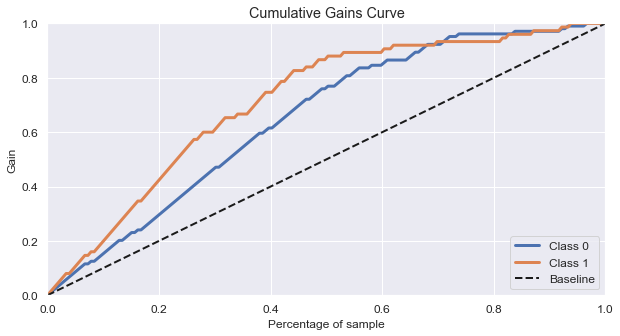

In [107]:
from scikitplot.metrics import plot_cumulative_gain

y_prob_forest = model_forest.predict_proba(X_test_tit)

plot_cumulative_gain(y_true= y_test_tit, y_probas=y_prob_forest);

L'axe horizontal représente les individus de l'échantillon test, l'axe vertical les personnes ayant survécu. La courbe montre qu'en ciblant, par exemple, un peu plus de 40% des passagers ayant obtenu le meilleur score par le modèle (c'est à dire les 40% des clients avec la plus forte probabilité de survivre) on peut atteindre plus de 80% des survivants réels ! 
Alors qu'en sélectionnant 40% aléatoirement parmi les passagers, seuls 40% des survivants seront atteints.


# <font color='orange'>Fin partie</font>

---

# Optimisation de notre algorithme

Nous entrons dans une phase "cruciale". En effet, les modèles que nous entrainons comportent parfois beaucoup d'hyperparamètres. Les hyperparamètres correspondent aux réglages de nos modèles. Ils déterminent comment le modèle apprend et se comporte. Ainsi, les hyperparamètres sont en mesure de détermner la réussite ou non de notre modélisation.

Une possibilité pour réaliser l'optimisation d'un modèle et la recher des meilleurs hyperparamètres, c'est de passer la `GridSearchCV` (fonction du package `sklearn.model_selection`).

Comment fonctionne la `GridSearchCV` ? Il s'agit de déclarer (notamment) :
1. `param_grid` : Un dictionnaire comprenant les hyperparamètres que l'on souhaite optimiser et pour chaque hyperparamètre, une liste de valeurs que l'on souhaite tester.
2. `estimator` : Un estimateur (classifieur, regresseur, qui doit avoir été instancier au préalable)
3. `cv` : Le nombre de validations croisées souhaitées
4. (Recommandé) `n_jobs` : le nombre de processeurs (-1 indique tous les processeurs disponibles).

Ainsi, avec l'ensemble de ces paramètres la grid search cv réalise les tests des différentes combinaisons de l'ensemble de ces hyperparamètres et abouti avec la meilleur combinaison pour le modèle.


> <u>Consignes : Attention, peut nécessiter un petit moment pour s'exécuter</u>
> * Importer `GridSearchCV` depuis la bibliothèque `sklearn.model_selection`.
> * Créer `param_grid` un dictionnaire listant le couples des paramètres : `'n_estimators': [50, 100, 200]`, `'max_features': ['auto', 'sqrt', 'log2']`, `'max_depth' : [4,5,6,7,8, 10]` , `'criterion' :['gini', 'entropy']` et `'class_weight' : ['None', {0:1, 1:2}]`.
> * Instancier `rfc` un classifieur `RandomForestClassifier` dans laquelle nous ne spécifierons que le random state fixé à 311.
> * Créer `model_forest_cv` une instance de `GridSearchCV()` pour lequel vous spécifierez l'estimateur (le classifieur que vous venez de créer), le dictionnaire de paramètres que nous venons de créer, spécifier **5** étapes de validation croisée, et spécifiez aussi que vous souhaitez dédier **toute votre puissance cpu** pour ce calul.
> * Entrainer votre modèle sur les **données d'entrainement**.

In [108]:
from sklearn.model_selection import GridSearchCV

param_grid = {'n_estimators': [50, 100, 200], 
              'max_features': ['auto', 'sqrt', 'log2'], 
              'max_depth' : [4,5,6,7,8, 10] , 
              'criterion' :['gini', 'entropy'], 
              'class_weight' : ['None', {0:1, 1:2}]
             }

rcf = RandomForestClassifier(random_state=311)

model_forest_cv = GridSearchCV(estimator=rcf, param_grid=param_grid, cv=5, n_jobs=-1)

model_forest_cv.fit(X_train_tit, y_train_tit)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=311),
             n_jobs=-1,
             param_grid={'class_weight': ['None', {0: 1, 1: 2}],
                         'criterion': ['gini', 'entropy'],
                         'max_depth': [4, 5, 6, 7, 8, 10],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': [50, 100, 200]})

## Quels sont les meilleurs hyperparamètres ?

Mainteant que les calculs sont réalisés, nous allons profiter d'un attirbut de notre instance `GridSearchCV`. En effet, cette instance possède un attribut `best_params_` très intéressant puisqu'il continent la combinaison de paramètres retenus comme les meilleurs.

> <u>Consigne :</u>
> * Identifier la meilleur combinaison de paramètres proposée par la `GridSearchCV`.

In [109]:
model_forest_cv.best_params_

{'class_weight': {0: 1, 1: 2},
 'criterion': 'entropy',
 'max_depth': 8,
 'max_features': 'log2',
 'n_estimators': 200}

# <font color='orange'>Fin partie</font>

---

# Re-créons notre modèle

Une fois que la meilleur combinaison est identifiée, il est d'usage de recréer un nouveau modèle avec les hyperparamètres optimaux.

> <u>Consigne :</u>
> * Créer `model_forest2` une instance `RandomForestClassifier()` ayant pour état aléatoire 311. Les autres hyperparamètres doivent correspondre à la meilleure combinaison identifiée juste au dessus.
> * Entrainer `model_forest2`.

In [110]:
model_forest2 = RandomForestClassifier(random_state=311, 
                                       class_weight={0: 1, 1: 2},
                                      criterion='entropy',
                                       max_depth=8,
                                       max_features='log2',
                                       n_estimators=200
                                      )

model_forest2.fit(X_train_tit, y_train_tit)

RandomForestClassifier(class_weight={0: 1, 1: 2}, criterion='entropy',
                       max_depth=8, max_features='log2', n_estimators=200,
                       random_state=311)

# Quelles sont les performances :

> <u>Consignes :</u>
> * Créer et afficher `scores_train2` et `scores_test2` l'accuracy sur les **jeux d'entrainement** et **de test** respectivement (seuls 2 chiffres après la virgule sont nécessaires).

In [111]:
scores_train2 = model_forest2.score(X_train_tit, y_train_tit)
scores_test2 = model_forest2.score(X_test_tit, y_test_tit)

print(scores_train2)
print(scores_test2)

0.8328651685393258
0.7988826815642458


# Attention !

Comme toujours, votre vision, votre réflexion et votre vigilence sont toujours nécessaires.
En effet, comme vous pourrez le constater, et de manière générale, les instructions sont toujours réalisées "bêtement", dans le sens ou la machine ne réalise que ce que vous lui demandez.

Par exemple : vous faites face à une distribution des données qui ne suit pas une loi normale. Vous calculez la moyenne d'une variable. Vous allez obtenir un résultats. Votre ordinateur (ou calculatrice) ne vous indiquera pas : "Attention, la valeur à laquelle vous faites face n'a aucun sens puisqu'elle ne représente pas la distribution de votre population...".


De la même manière, ici, nous n'avons pas spécifié à la `GridSearchCV()` de méthode de scoring. L'algorithme se focalise donc sur les paramètres originaux. De plus, le scoring ne prend en compte que l'échantillon d'entrainement. Voyons un exemple de ce à quoi nous pourrions réfléchir.

> <u>Consignes :</u>
> * Créer `model_forest3`, un `RandomForestClassifier()` identique au `model_forest2`. Modifier uniquement la profondeur maximale : fixée à **5**.
> * Entrainer `model_forest3`.
> * Créer et afficher `scores_train3` et `scores_test3` l'accuracy sur les **jeux d'entrainement** et **de test** respectivement (seuls 2 chiffres après la virgule sont nécessaires).
>
>
> * Qu'en pensez-vous ?

In [123]:
model_forest3 = RandomForestClassifier(random_state=311, 
                                       class_weight={0: 1, 1: 2},
                                      criterion='entropy',
                                       max_depth=5,
                                       max_features='log2',
                                       n_estimators=200
                                      )

model_forest3.fit(X_train_tit, y_train_tit)

scores_train3 = model_forest3.score(X_train_tit, y_train_tit)
scores_test3 = model_forest3.score(X_test_tit, y_test_tit)

print(scores_train3)
print(scores_test3)

0.7991573033707865
0.7988826815642458


Comme vous pouvez le constater, le score sur le train a sensiblement diminué (de 0,85 à 0,82), mais... le score sur le test à lui un peu augmenté (de 0,80 à 0,82). Nous avons ici un modèle qui performe aussi bien sur le train que sur le test. La question que l'on pourrait se poser est alors : quel modèle prioriser ? il n'y a pas vraiment de bonne réponse à cette question à ce stade. En effet le set de validation est plutot petit, donc le meilleur conseil serait de choisir "arbitrairement" un modèle, et procéder un nouvel entrainement quand plus de données seront disponibles.

# <font color='orange'>Fin partie</font>

--------------------------------------------

--------------------------------------------

# Bagging, le boosting...

## Bagging ! (Boostrap AGGregatING)
Nous venons de voir un exemple spécifique de bagging : l'algorithme de random forest qui est le bagging des arbres de décision CART.
D'un point de vue plus général, le bagging correspond aux méthodes visant à réduire la variance et à augmenter la stabilité des algorithmes de machine learning utilisés pour la classification ou la régression.

La méthode générale du Bagging consiste principalement en l'entraînement d'un modèle sur différents sous-ensembles de même taille que l'échantillon initial, par la technique de **Bootstrap, c'est à dire de tirage aléatoire avec remise**. La méthode construit donc un ensemble d'estimateurs indépendants (contrairement au Boosting). Ces indicateurs ndépendants seront par la suite agrégés (ou baggés) en un méta-modèle, avec un vote majoritaire pour la classification, et une moyenne pour la régression. 

Contrairement au Boosting, choisir un grand nombre d'estimateurs n'entraînera pas de risque supplémentaire d'overfitting. En effet, plus le nombre d'estimateur est élevé, plus le biais du modèle final sera équivalent à la moyenne de biais agrégés et la variance diminuera d’autant plus que les estimateurs que l’on agrège seront décorrélés. On aura donc tout interêt à choisir un nombre d'estimateurs le plus élevé possible, en fonction du temps que l'on souhaite accorder au processus d'entraînement.

Les estimateurs ne sont pas en réalité indépendants. En effet, ils sont calculés sur des échantillons qui se recouvrent fortement (tirage avec remise) et donc ils sont corrélés.

Dans Scikit-learn (`sklearn.ensemble`), les méthodes de bagging sont implémentées via la classe `BaggingClassifier()` et `BaggingRegressor()`. Les constructeurs prennent en paramètres un estimateur de base et la stratégie de sélection des points et attributs :
* `base_estimator` : optionnel (default=None). Si None alors l’estimateur est un arbre de décision.
* `max_samples` : la taille de l’échantillon aléatoire tiré de la base d’apprentissage.
* `max_features` : le nombre d’attributs tirés aléatoirement.
* `bootstrap` : boolean, optionnel (default=True). Tirage des points avec remise ou non.
* `bootstrap_features` : boolean, optionnel (default=False). Tirage des attributs avec remise ou non.
* `oob_score` : boolean. Estimer ou non l’erreur de généralisation OOB (Out of Bag) : pour chaque observation on calcule la moyenne des erreurs pour tous les modèles entraînés sur un échantillon bootstrapé dont elle ne fait pas partie. Cette technique aide à prévenir l'over-fitting.



## Boosting

Le principe du boosting est de combiner les sorties de plusieurs classifieurs faibles (weak classifier) pour obtenir un résultat plus fort (strong classifier). Le classifieur faible doit avoir un comportement de base un peu meilleur que l’aléatoire : taux d’erreurs inférieur à 0.5 pour une classification binaire (c’est-à-dire qu’il ne se trompe pas plus d’une fois sur deux en moyenne, si la répartition des classes est équilibrée). Chaque classifieur faible est pondéré par la qualité de sa classification : mieux il classe, plus il sera important. Les exemples mal classés aurons un poids plus important (on dit qu’ils sont boostés) vis-à-vis de l’apprenant faible au prochain tour, afin qu’il pallie le manque.

Avec `sklearn.ensemble`, c’est la classe `AdaBoostClassifier()` qui implémente cet algorithme. Les paramètres les plus importants sont :
* `n_estimators` : integer, optional (default=10). Le nombre de classifieurs faibles.
* `learning_rate` : contrôle la vitesse de changement des poids par itération.
* `base_estimator` : (default=DecisionTreeClassifier) le classifieur faible utilisé.

--------------------------------------------------------------------

> <u>Consignes : </u>Attention, la cellule suivant peut prendre du temps à s'éxécuter
> * Importer `AdaBoostClassifier` de la bibliothèque `sklearn.ensemble`
>
>
> * Créer `tree1` un classifier `DecisionTreeClassifier`. Fixer simplement l'état aléatoire à 444.
>
>
> * Créer `param_grid2` un **dictionnaire** contenant les clés/valeurs suivantes : `'n_estimators': [100, 120, 150]` , `'base_estimator__max_depth': [2, 3, 5]` , `'base_estimator__class_weight' : ['None', {0:1, 1:2}]` et `'learning_rate' : [1, 0.1, 0.01]`. Vous noterez la nommenclature : lorsque l'on souhaite tester des paramètres d'un estimateur de base, il faut spécifier `base_estimator__` devant le paramètre en question.
>
>
> * Créer `ada` un classifier `AdaBoostClassifier()`. Indiquer que le classifieur de base est `tree1`. Fixer également l'état aléatoire à 444.
>
>
> * Créer `model_ada_cv` une instance `GridSearchCV()`. Spécifier l'estimateur (`ada`), la grille de paramètres, l'argument verbose à 1. Nous choisissons de realiser la recherche avec une validation croisée sur 5 échantillons. Ne pas oublier de spécifier que l'on souhaite utiliser toute la puissance CPU disponible.
> * Entrainer `model_ada_cv` sur nos **données d'entrainement**.


In [118]:
from sklearn.ensemble import AdaBoostClassifier

tree1 = DecisionTreeClassifier(random_state=444)

param_grid2 = {'n_estimators': [100, 120, 150] , 
               'base_estimator__max_depth': [2, 3, 5] , 
               'base_estimator__class_weight' : ['None', {0:1, 1:2}] , 
               'learning_rate' : [1, 0.1, 0.01]
              }

ada = AdaBoostClassifier(tree1, random_state=444)

model_ada_cv = GridSearchCV(estimator=ada, param_grid=param_grid2, verbose=1, cv= 5, n_jobs=-1)
model_ada_cv.fit(X_train_tit, y_train_tit)


Fitting 5 folds for each of 54 candidates, totalling 270 fits


GridSearchCV(cv=5,
             estimator=AdaBoostClassifier(base_estimator=DecisionTreeClassifier(random_state=444),
                                          random_state=444),
             n_jobs=-1,
             param_grid={'base_estimator__class_weight': ['None', {0: 1, 1: 2}],
                         'base_estimator__max_depth': [2, 3, 5],
                         'learning_rate': [1, 0.1, 0.01],
                         'n_estimators': [100, 120, 150]},
             verbose=1)

> <u>Consignes : </u>
> * Afficher la combinaison des meilleurs paramètres retenus.
>
>
> * Que constatez-vous ?

In [119]:
model_ada_cv.best_estimator_

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(class_weight={0: 1,
                                                                       1: 2},
                                                         max_depth=2,
                                                         random_state=444),
                   learning_rate=0.1, n_estimators=120, random_state=444)

Le boosting fonctionne comme nous l'avons dit sur la base de l'optimisation de classifieurs dit faibles. Nous pouvons constater ici que les paramètres ont retenu une profondeur d'arbres à 2 (`max_depth`) ce qui nous renseigne que la recherche d'hyperparamètres à naturellement choisi un claissifieur faible, ce qui a permi d'optimiser la classification.


--------------------------------------------------

# Modèle boosting final

Nous allons donc reproduire notre modèle optimal et l'évaluer.

> <u>Consignes :</u>
> * Créer `tree2` un classifier `DecisionTreeClassifier`. Indiquer les paramètres issus de la GridSearchCV. Fixer également l'état aléatoire à 444.
>
> * Créer `ada2` un classifier `AdaBoostClassifier()`. Pour les paramètres, spécifier les paramètres issus de la GridSearchCV. Fixer également l'état aléatoire à 444.
>
>
> * Entrainer `ada2` sur nos **données d'entrainement**.
> * Créer `y_pred_ada2` : les prédictions de notre modèle sur les **données de test**.
>
>
> * Créer `cross1` la matrice de confusion qui prend en arguments les données test et les prédictions.
>
>
> * Afficher : 
    * Le score du modèle sur les données d'entrainement
    * Le score du modèle sur les données de test
    * Le rapport de classification
    * La matrice de confusion


In [121]:
tree2 = DecisionTreeClassifier(class_weight={0: 1,1: 2},
                               max_depth=2,
                               random_state=444
                              )

ada2 = AdaBoostClassifier(learning_rate=0.1, n_estimators=120, random_state=444)
ada2.fit(X_train_tit, y_train_tit)

y_pred_ada2 = ada2.predict(X_test_tit)

cross1 = confusion_matrix(y_test_tit, y_pred_ada2)

print("Score du training :")
print(ada2.score(X_train_tit,y_train_tit))

print("\nScore du testing :")
print(ada2.score(X_test_tit,y_test_tit))

print("\nRapport de classification :")
print(classification_report(y_test_tit, y_pred_ada2))

print("\nMatrice de confusion :")
print(cross1)


Score du training :
0.8202247191011236

Score du testing :
0.8100558659217877

Rapport de classification :
              precision    recall  f1-score   support

           0       0.81      0.88      0.84       104
           1       0.81      0.72      0.76        75

    accuracy                           0.81       179
   macro avg       0.81      0.80      0.80       179
weighted avg       0.81      0.81      0.81       179


Matrice de confusion :
[[91 13]
 [21 54]]
